# Evaluating and Predicting Student Performance Through Machine Learning

## Import Libraries

In [2]:
#import required libraries
import pandas as pd
import numpy as np
pd.set_option('mode.chained_assignment', None)
import matplotlib.pyplot as plt
from matplotlib import style
%matplotlib inline
import seaborn as sns
sns.set_theme()
import warnings
warnings.filterwarnings('ignore')
%config InlineBackend.figure_formats = {'png', 'retina'}

#import costume mode for descriptive statistics
import statistics as stat

#For splitting of data into train and test set
from sklearn.model_selection import train_test_split

# for random forest regression modelling
from sklearn.ensemble import RandomForestRegressor

#for random forest classification modelling
from sklearn.ensemble import RandomForestClassifier

#for support vector machine modelling
from sklearn.svm import SVC

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

#for encoding categorical variables
from sklearn.preprocessing import StandardScaler, LabelEncoder

#For performing Oversampling
import imblearn
from imblearn.over_sampling import (SMOTE, RandomOverSampler)
from imblearn.over_sampling import SMOTE

#for performing undersampling
from imblearn.under_sampling import RandomUnderSampler

#for metric and accuracy reports
from collections import Counter
from sklearn.metrics import classification_report
from sklearn.metrics import make_scorer, accuracy_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

from sklearn.linear_model import Perceptron
from sklearn.feature_extraction.text import TfidfVectorizer

# For Standardizing data
from sklearn.preprocessing import StandardScaler

#For hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint

from sklearn.model_selection import GridSearchCV
#from sklearn.model_selection import cross_val_score
#from sklearn.preprocessing import MinMaxScaler

import time


### Read and view the datasets

In [3]:
#read the dataset from text file into a dataframe
df_mat = pd.read_csv("student-mat.csv", index_col=0, delimiter=";")
df_por = pd.read_csv("student-por.csv", index_col=0, delimiter=";")

In [43]:
df_mat

,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
school,,,,,,,,,,,,,,,,,,,,,
GP,F,18,U,GT3,A,4,4,at_home,teacher,course,...,4,3,4,1,1,3,6,5,6,6
GP,F,17,U,GT3,T,1,1,at_home,other,course,...,5,3,3,1,1,3,4,5,5,6
GP,F,15,U,LE3,T,1,1,at_home,other,other,...,4,3,2,2,3,3,10,7,8,10
GP,F,15,U,GT3,T,4,2,health,services,home,...,3,2,2,1,1,5,2,15,14,15
GP,F,16,U,GT3,T,3,3,other,other,home,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MS,M,20,U,LE3,A,2,2,services,services,course,...,5,5,4,4,5,4,11,9,9,9
MS,M,17,U,LE3,T,3,1,services,services,course,...,2,4,5,3,4,2,3,14,16,16
MS,M,21,R,GT3,T,1,1,other,other,course,...,5,5,3,3,3,3,3,10,8,7


In [44]:
df_por

,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
school,,,,,,,,,,,,,,,,,,,,,
GP,F,18,U,GT3,A,4,4,at_home,teacher,course,...,4,3,4,1,1,3,4,0,11,11
GP,F,17,U,GT3,T,1,1,at_home,other,course,...,5,3,3,1,1,3,2,9,11,11
GP,F,15,U,LE3,T,1,1,at_home,other,other,...,4,3,2,2,3,3,6,12,13,12
GP,F,15,U,GT3,T,4,2,health,services,home,...,3,2,2,1,1,5,0,14,14,14
GP,F,16,U,GT3,T,3,3,other,other,home,...,4,3,2,1,2,5,0,11,13,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MS,F,19,R,GT3,T,2,3,services,other,course,...,5,4,2,1,2,5,4,10,11,10
MS,F,18,U,LE3,T,3,1,teacher,services,course,...,4,3,4,1,1,1,4,15,15,16
MS,F,18,U,GT3,T,1,1,other,other,course,...,1,1,1,1,1,5,6,11,12,9


## Exploratory Data Analysis

In [45]:
df_mat.shape

(395, 32)

In [46]:
df_por.shape

(649, 32)

In [4]:
# Merging both datasets into one
frames = [df_mat, df_por]
df_student = pd.concat(frames, axis=0, ignore_index=True)

In [48]:
df_student

,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,F,18,U,GT3,A,4,4,at_home,teacher,course,...,4,3,4,1,1,3,6,5,6,6
1,F,17,U,GT3,T,1,1,at_home,other,course,...,5,3,3,1,1,3,4,5,5,6
2,F,15,U,LE3,T,1,1,at_home,other,other,...,4,3,2,2,3,3,10,7,8,10
3,F,15,U,GT3,T,4,2,health,services,home,...,3,2,2,1,1,5,2,15,14,15
4,F,16,U,GT3,T,3,3,other,other,home,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1039,F,19,R,GT3,T,2,3,services,other,course,...,5,4,2,1,2,5,4,10,11,10
1040,F,18,U,LE3,T,3,1,teacher,services,course,...,4,3,4,1,1,1,4,15,15,16
1041,F,18,U,GT3,T,1,1,other,other,course,...,1,1,1,1,1,5,6,11,12,9
1042,M,17,U,LE3,T,3,1,services,services,course,...,2,4,5,3,4,2,6,10,10,10


In [49]:
df_student.shape

(1044, 32)

In [50]:
df_student.head(10)

,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,F,18,U,GT3,A,4,4,at_home,teacher,course,...,4,3,4,1,1,3,6,5,6,6
1,F,17,U,GT3,T,1,1,at_home,other,course,...,5,3,3,1,1,3,4,5,5,6
2,F,15,U,LE3,T,1,1,at_home,other,other,...,4,3,2,2,3,3,10,7,8,10
3,F,15,U,GT3,T,4,2,health,services,home,...,3,2,2,1,1,5,2,15,14,15
4,F,16,U,GT3,T,3,3,other,other,home,...,4,3,2,1,2,5,4,6,10,10
5,M,16,U,LE3,T,4,3,services,other,reputation,...,5,4,2,1,2,5,10,15,15,15
6,M,16,U,LE3,T,2,2,other,other,home,...,4,4,4,1,1,3,0,12,12,11
7,F,17,U,GT3,A,4,4,other,teacher,home,...,4,1,4,1,1,1,6,6,5,6
8,M,15,U,LE3,A,3,2,services,other,home,...,4,2,2,1,1,1,0,16,18,19
9,M,15,U,GT3,T,3,4,other,other,home,...,5,5,1,1,1,5,0,14,15,15


In [51]:
df_student.tail(10)

,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
1034,M,19,R,GT3,T,1,1,other,services,other,...,4,3,2,1,3,5,0,5,8,0
1035,M,18,R,GT3,T,4,2,other,other,home,...,5,4,3,4,3,3,0,7,7,0
1036,F,18,R,GT3,T,2,2,at_home,other,other,...,5,3,3,1,3,4,0,14,17,15
1037,F,17,U,GT3,T,4,3,teacher,other,other,...,5,5,4,1,1,1,0,6,9,11
1038,F,18,R,GT3,T,4,4,teacher,at_home,reputation,...,4,4,3,2,2,5,4,7,9,10
1039,F,19,R,GT3,T,2,3,services,other,course,...,5,4,2,1,2,5,4,10,11,10
1040,F,18,U,LE3,T,3,1,teacher,services,course,...,4,3,4,1,1,1,4,15,15,16
1041,F,18,U,GT3,T,1,1,other,other,course,...,1,1,1,1,1,5,6,11,12,9
1042,M,17,U,LE3,T,3,1,services,services,course,...,2,4,5,3,4,2,6,10,10,10
1043,M,18,R,LE3,T,3,2,services,other,course,...,4,4,1,3,4,5,4,10,11,11


In [52]:
df_student.index

RangeIndex(start=0, stop=1044, step=1)

In [53]:
df_student.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1044 entries, 0 to 1043
Data columns (total 32 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   sex         1044 non-null   object
 1   age         1044 non-null   int64 
 2   address     1044 non-null   object
 3   famsize     1044 non-null   object
 4   Pstatus     1044 non-null   object
 5   Medu        1044 non-null   int64 
 6   Fedu        1044 non-null   int64 
 7   Mjob        1044 non-null   object
 8   Fjob        1044 non-null   object
 9   reason      1044 non-null   object
 10  guardian    1044 non-null   object
 11  traveltime  1044 non-null   int64 
 12  studytime   1044 non-null   int64 
 13  failures    1044 non-null   int64 
 14  schoolsup   1044 non-null   object
 15  famsup      1044 non-null   object
 16  paid        1044 non-null   object
 17  activities  1044 non-null   object
 18  nursery     1044 non-null   object
 19  higher      1044 non-null   object
 20  internet

In [54]:
df_student.columns

Index(['sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob',
       'Fjob', 'reason', 'guardian', 'traveltime', 'studytime', 'failures',
       'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher',
       'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc',
       'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [55]:
print(df_student.groupby('G3').size())

G3
0      53
1       1
4       1
5       8
6      18
7      19
8      67
9      63
10    153
11    151
12    103
13    113
14     90
15     82
16     52
17     35
18     27
19      7
20      1
dtype: int64


In [56]:
df_student.isnull().any()

sex           False
age           False
address       False
famsize       False
Pstatus       False
Medu          False
Fedu          False
Mjob          False
Fjob          False
reason        False
guardian      False
traveltime    False
studytime     False
failures      False
schoolsup     False
famsup        False
paid          False
activities    False
nursery       False
higher        False
internet      False
romantic      False
famrel        False
freetime      False
goout         False
Dalc          False
Walc          False
health        False
absences      False
G1            False
G2            False
G3            False
dtype: bool

In [57]:
df_student.isnull().sum()

sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

In [58]:
df_student.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1039    False
1040    False
1041    False
1042    False
1043    False
Length: 1044, dtype: bool

In [59]:
df_student.loc[df_student.duplicated(), :]

,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3


### Statistical Analyis

#### Descriptive statistics for student performance

In [60]:
count = stat.count(df_student)
mean = stat.mean(df_student)
maxVal = stat.maxValue(df_student)
minVal = stat.minValue(df_student)
std = stat.standardDev(df_student)
var = stat.variance(df_student)
tfive = stat.twentyFivePercentile(df_student)
fifive = stat.fiftyFivePercentile(df_student)
sfive = stat.seventyFivePercentile(df_student)
sk = stat.skewness(df_student)
kt = stat.kurt(df_student)

In [61]:
print("Descriptive statistics for student performance")
data = [count, mean, maxVal, minVal, std, var, sk, kt]
cols = df_student.select_dtypes(include=["int64", "float64", "datetime64"]).columns
stats = ['Count', 'Mean', 'Max', 'Min', 'Std', 'Var', 'Skew', 'Kurt']
df_student_stats = pd.DataFrame(data,index= stats,columns=cols)
df_student_stats

Descriptive statistics for student performance


,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
Count,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000
Mean,16.726054,2.603448,2.387931,1.522989,1.970307,0.264368,3.935824,3.201149,3.156130,1.494253,2.284483,3.543103,4.434866,11.213602,11.246169,11.341954
Max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000
Min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
Std,1.240000,1.120000,1.100000,0.730000,0.830000,0.660000,0.930000,1.030000,1.150000,0.910000,1.280000,1.420000,6.210000,2.980000,3.280000,3.860000
Var,1.540000,1.260000,1.210000,0.530000,0.700000,0.430000,0.870000,1.060000,1.330000,0.830000,1.650000,2.030000,38.530000,8.890000,10.780000,14.920000
Skew,0.434028,-0.139528,0.119447,1.369314,0.670982,2.783660,-1.055775,-0.178707,0.038928,2.157973,0.625923,-0.498800,3.741347,0.077922,-0.497357,-0.985965
Kurt,0.036774,-1.227948,-1.167242,1.475579,0.006620,7.495350,1.291780,-0.360339,-0.835491,4.476565,-0.780492,-1.081554,26.596200,-0.329007,1.335619,1.744319


## Data Visualization

array([[<AxesSubplot:title={'center':'G1'}>,
        <AxesSubplot:title={'center':'G2'}>],
       [<AxesSubplot:title={'center':'G3'}>, <AxesSubplot:>]],
      dtype=object)

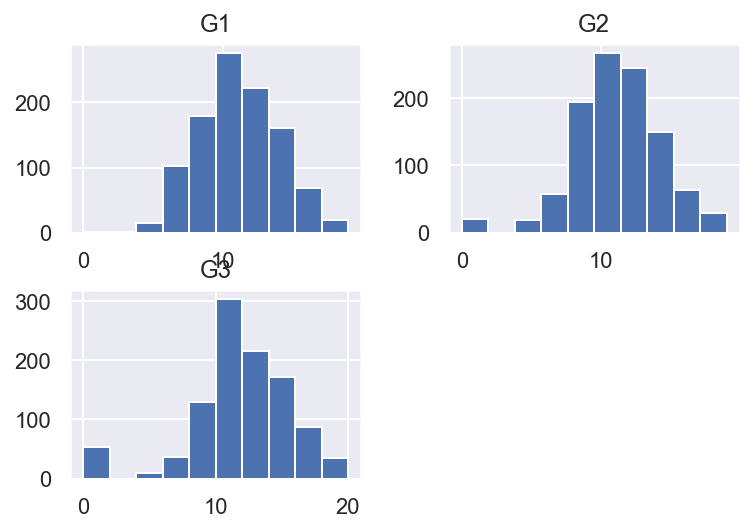

In [62]:
df_student[['G1', 'G2', 'G3']].hist()

In [63]:
sex = df_student.sex.value_counts()

In [64]:
sex

F    591
M    453
Name: sex, dtype: int64

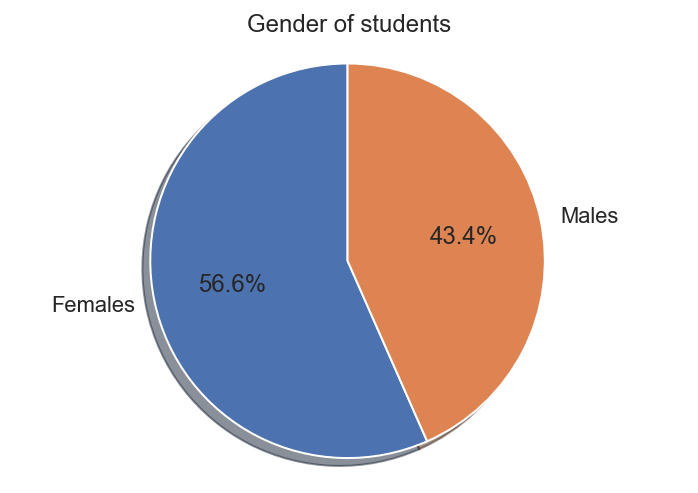

In [65]:
plt.pie(sex, labels =["Females", "Males"], autopct='%1.1f%%', shadow=True, startangle=90)
plt.title("Gender of students")
plt.axis('equal')
plt.show()

#### The data from the pie chart shows that amongst the 1044 students considered, 56.6% totallinng 591 are females while 43.4% totalling 453 are males

In [66]:
Age = df_student.age.value_counts()
Age

16    281
17    277
18    222
15    194
19     56
20      9
21      3
22      2
Name: age, dtype: int64

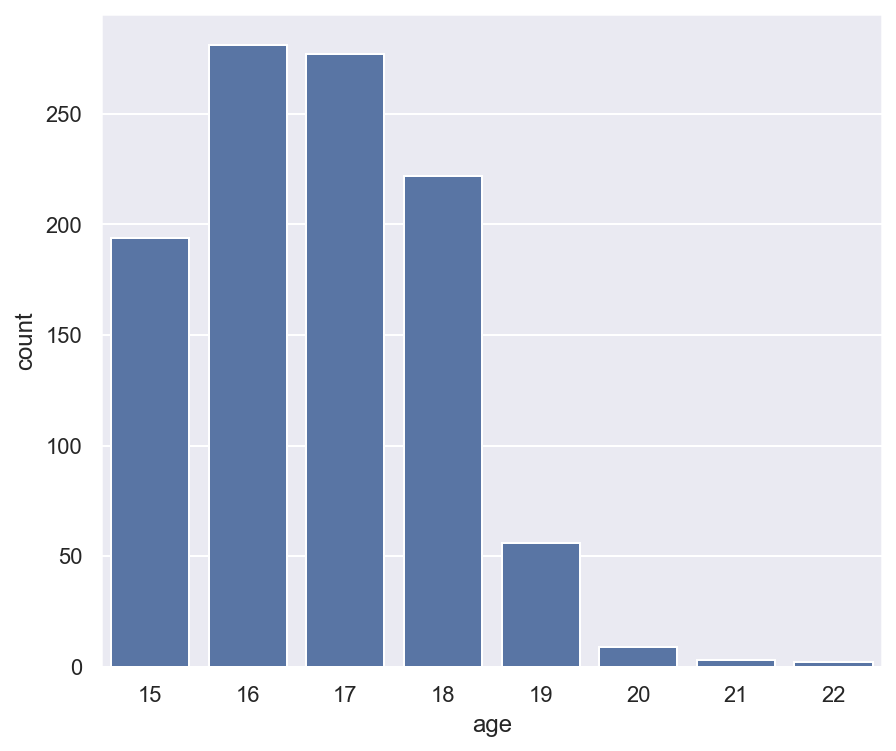

In [67]:
plt.figure(figsize=(7, 6))
sns.countplot(x="age", color="b", data=df_student)
sns.set_style("white")

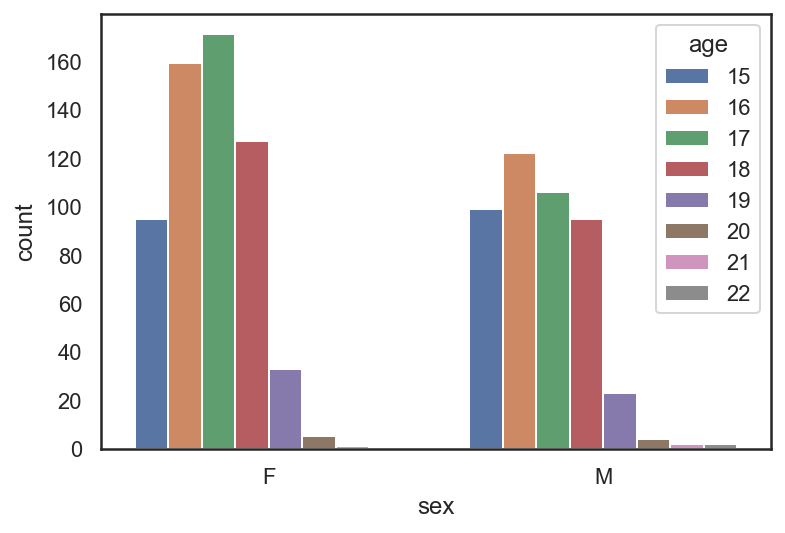

In [68]:
sns.countplot(df_student['sex'],hue=df_student['age'])
#plt.figure(figsize=(7, 6))
plt.rcParams["figure.figsize"] = (7,6)
sns.set_style("white")

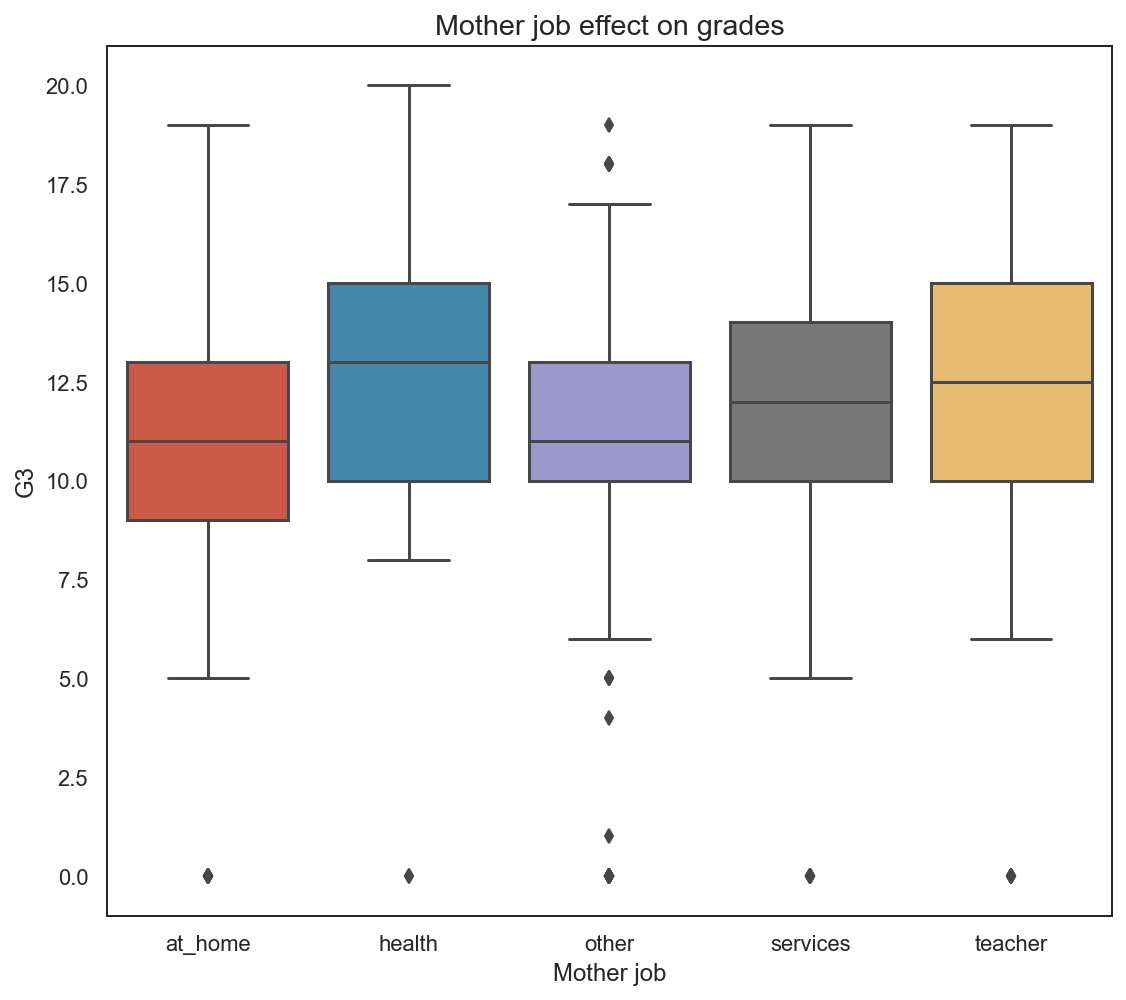

In [93]:
ax = sns.boxplot(x=df_student['Mjob'],y=df_student['G3'])
ax.set_title('Mother job effect on grades')
ax.set_xlabel('Mother job')
ax.set_ylabel('G3')
plt.show()

#### The box plot shows that the job of mothers generally has an influence on final grades 
#### Mothers in professions like health and teaching has more positive influence on grades than he other professions

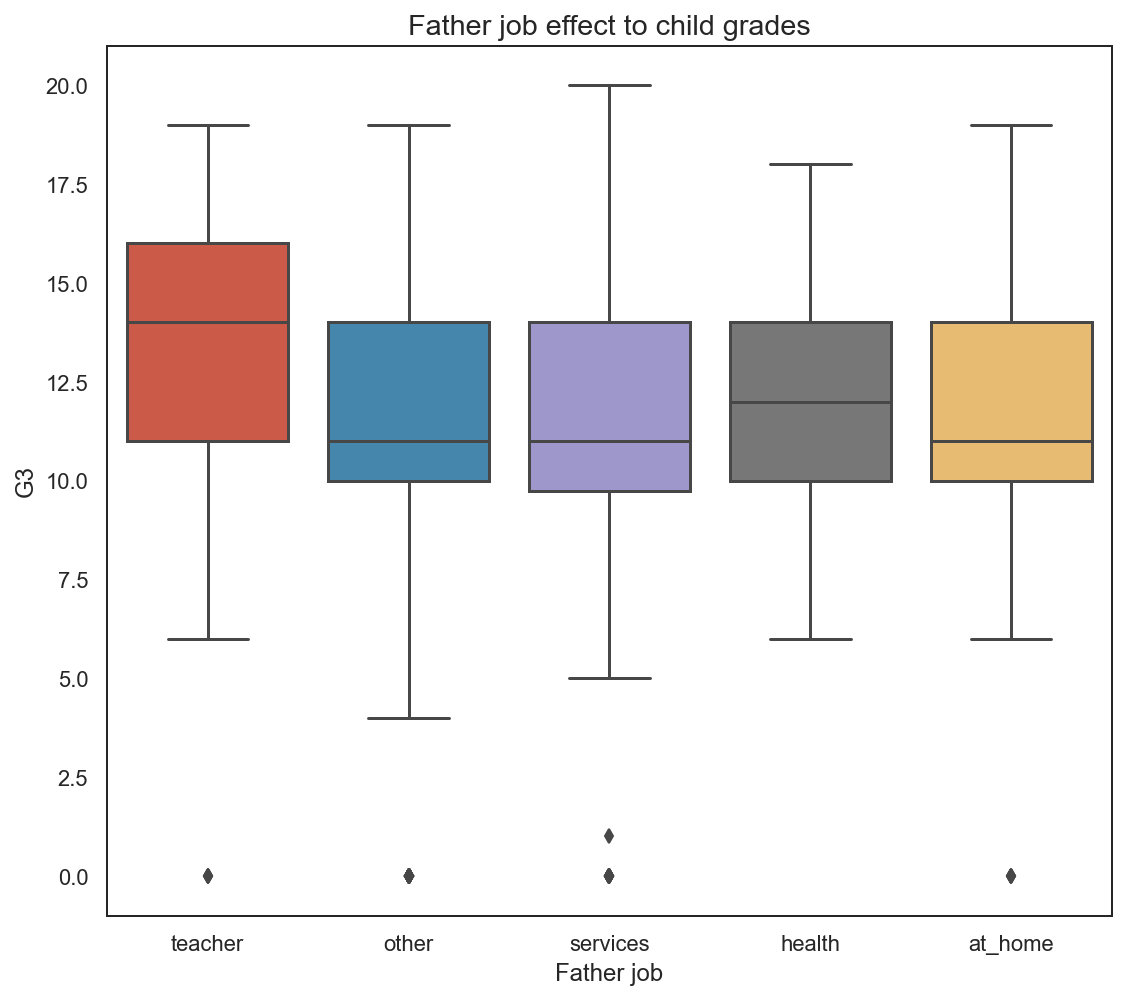

In [92]:
ax = sns.boxplot(x=df_student['Fjob'],y=df_student['G3'])
ax.set_title('Father job effect to child grades')
ax.set_xlabel('Father job')
ax.set_ylabel('G3')
plt.show()

#### The box plot shows that a father's job does not have much effect on grades

([<matplotlib.patches.Wedge at 0x2034c0461f0>,
 [Text(0.7959551010404636, 0.8980286616404097, '16'),
  Text(-0.8972537188357556, 0.6363456325263867, '17'),
  Text(-0.6968726858046311, -0.8510983843125541, '18'),
  Text(0.6432360009438248, -1.0130387194425472, '15'),
  Text(1.1618675149566753, -0.3001064439301496, '19'),
  Text(1.1980391718232823, -0.06857217203052532, '20'),
  Text(1.0997559699968815, -0.023169084060845394, '21'),
  Text(1.0999800783032228, -0.006620221751286435, '22')],
 [Text(0.4643071422736037, 0.5238500526235723, '26.9%'),
  Text(-0.4894111193649575, 0.3470976177416654, '26.5%'),
  Text(-0.3801123740752533, -0.4642354823523022, '21.3%'),
  Text(0.3752210005505644, -0.5909392530081525, '18.6%'),
  Text(0.677756050391394, -0.17506209229258726, '5.4%'),
  Text(0.6988561835635813, -0.04000043368447309, '0.9%'),
  Text(0.5998668927255716, -0.012637682215006578, '0.3%'),
  Text(0.5999891336199397, -0.0036110300461562367, '0.2%')])

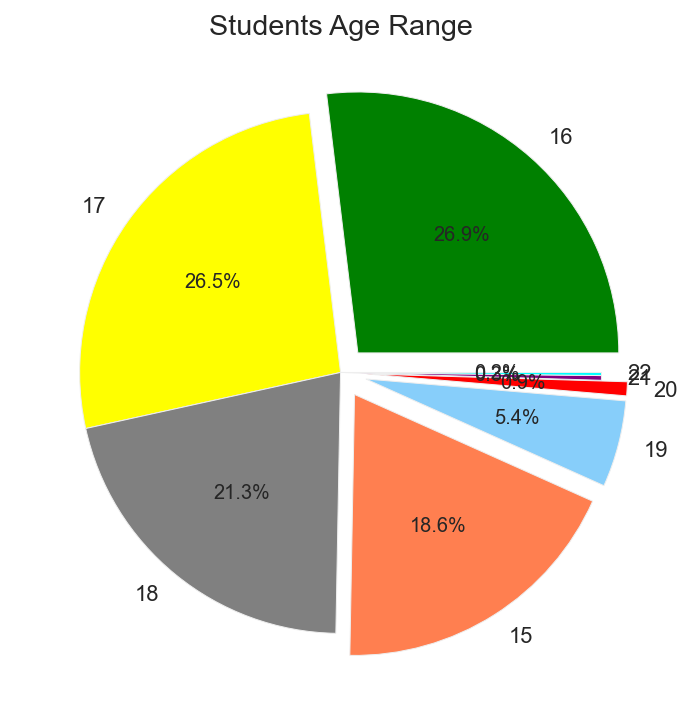

In [76]:
style.use('ggplot')
labels = ["16", "17", "18", "15", "19", "20", "21", "22"]
explode = [0.1, 0, 0, 0.1, 0.1, 0.1, 0, 0]
color = ['green','yellow','grey','coral','lightskyblue','red', 'purple', 'aqua']
plt.title("Students Age Range")
plt.pie(Age, labels=labels,colors=color,explode=explode,autopct ="%1.1f%%")

#### The histogram and pie charts shows the age range of students. Most are between ages 15 and 18. More of them are beteen 16 and 17 years

In [77]:
df_student["address"].replace({"U": "Urban", "R": "Rural"}, inplace=True)

In [78]:
df_student

,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,F,18,Urban,GT3,A,4,4,at_home,teacher,course,...,4,3,4,1,1,3,6,5,6,6
1,F,17,Urban,GT3,T,1,1,at_home,other,course,...,5,3,3,1,1,3,4,5,5,6
2,F,15,Urban,LE3,T,1,1,at_home,other,other,...,4,3,2,2,3,3,10,7,8,10
3,F,15,Urban,GT3,T,4,2,health,services,home,...,3,2,2,1,1,5,2,15,14,15
4,F,16,Urban,GT3,T,3,3,other,other,home,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1039,F,19,Rural,GT3,T,2,3,services,other,course,...,5,4,2,1,2,5,4,10,11,10
1040,F,18,Urban,LE3,T,3,1,teacher,services,course,...,4,3,4,1,1,1,4,15,15,16
1041,F,18,Urban,GT3,T,1,1,other,other,course,...,1,1,1,1,1,5,6,11,12,9
1042,M,17,Urban,LE3,T,3,1,services,services,course,...,2,4,5,3,4,2,6,10,10,10


<Figure size 504x432 with 0 Axes>

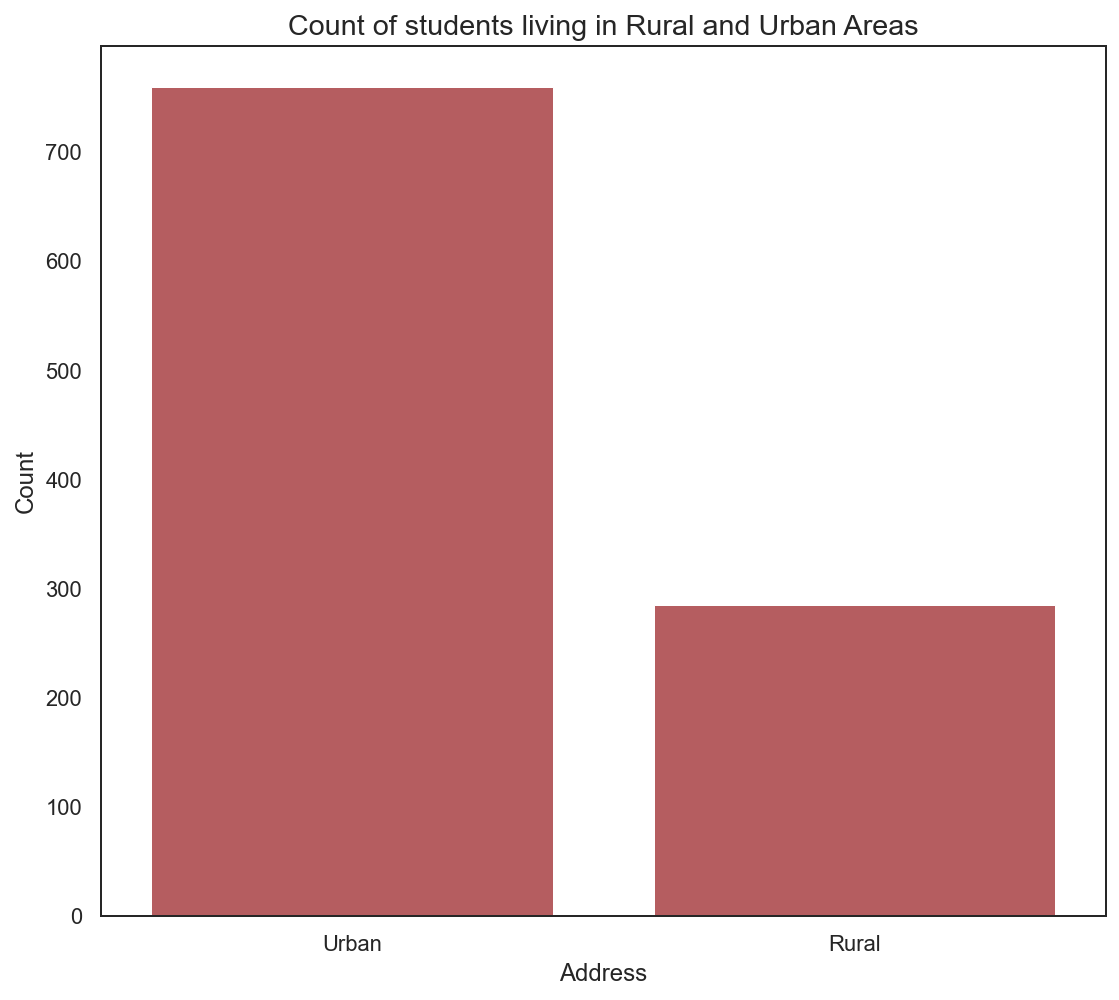

<Figure size 504x432 with 0 Axes>

In [91]:
address = ['Urban','Rural']
sns.countplot(x="address", color="r", data=df_student)
plt.xlabel("Address")
plt.ylabel("Count")
plt.title("Count of students living in Rural and Urban Areas")
plt.figure(figsize=(7, 6))
#plt.rcParams["figure.figsize"] = (7,6)

#### The bar plot above shows that there are more students living in Urban Areas than in Rural communities

In [80]:
address = df_student.address.value_counts()
address

Urban    759
Rural    285
Name: address, dtype: int64

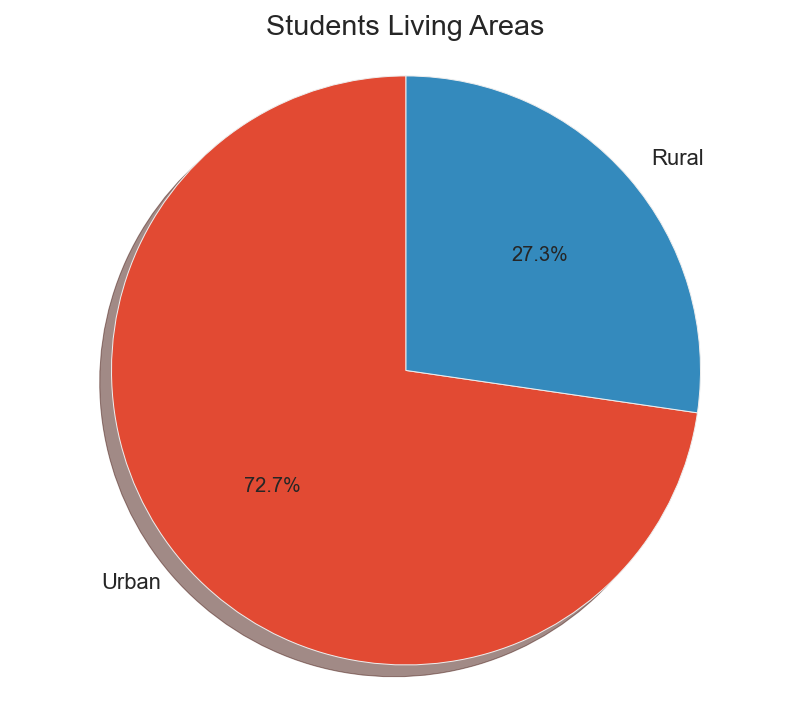

<Figure size 504x432 with 0 Axes>

In [81]:
plt.pie(address, labels =['Urban','Rural'], autopct='%1.1f%%', shadow=True, startangle=90)
plt.title("Students Living Areas")
plt.axis('equal')
plt.figure(figsize=(7, 6))
plt.show()

#### The pie charts helps to show the percentage of the students living in each type of area

<AxesSubplot:xlabel='G1', ylabel='count'>

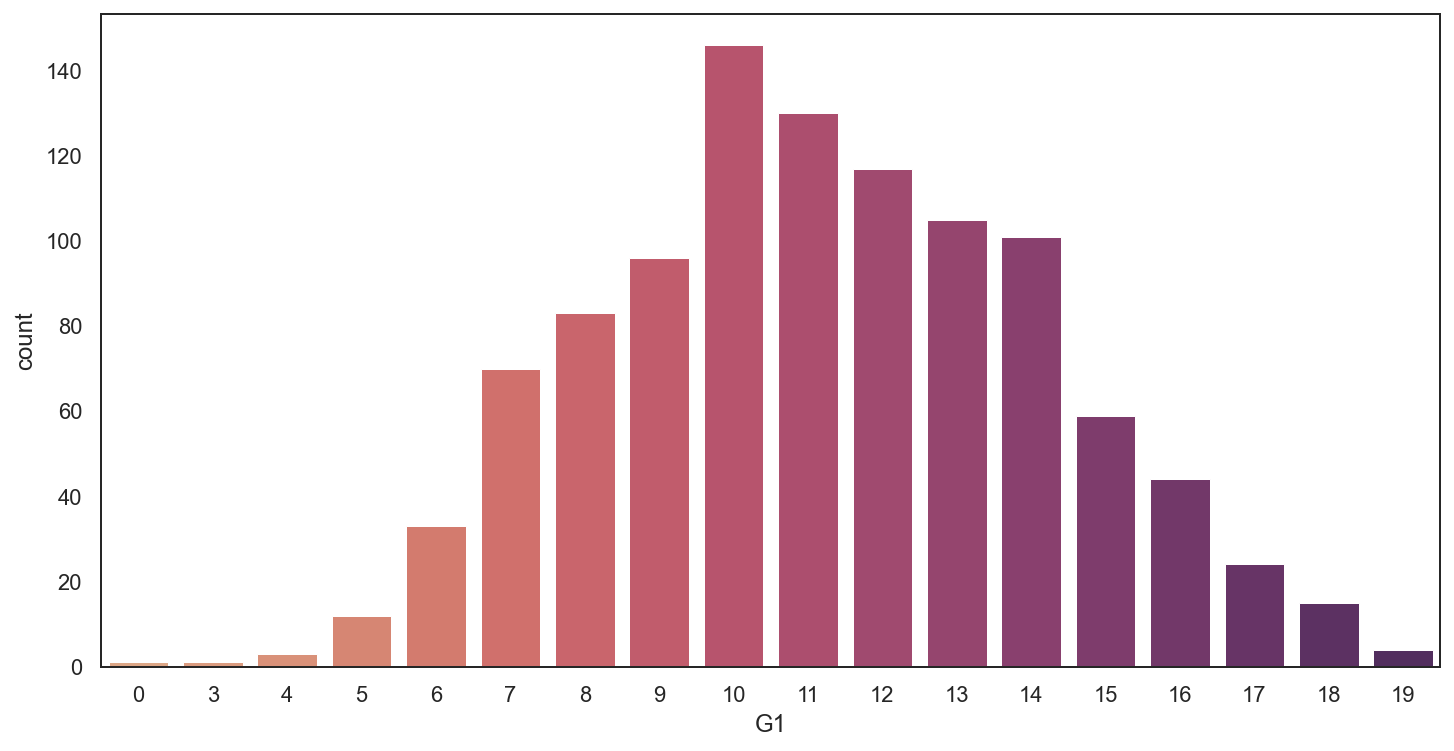

In [82]:
plt.figure(figsize=(12, 6))
sns.set_style("white")
sns.countplot(x=df_student['G1'], palette = 'flare')

#### The plot shows the range of G1 scores for the students. From this, we can see that most students scored 10 in their first examination. None scored 0 and none scored the full marks. 

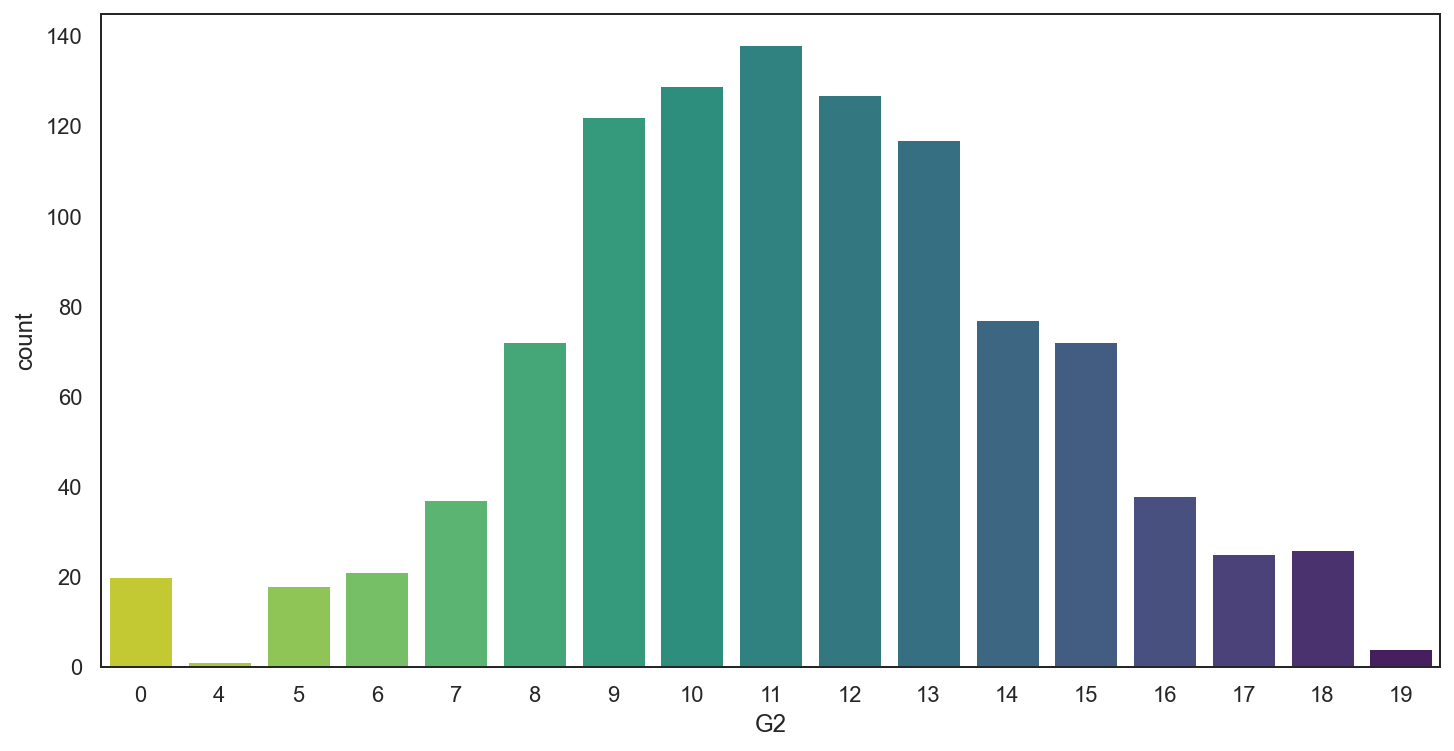

In [83]:
plt.figure(figsize=(12, 6))
sns.set_style("white")
#sns.countplot(x="G2", color="r", data=df_student)
sns.countplot(x=df_student['G2'], palette='viridis_r')
plt.show()

#### The plot shows the range of G2 scores for the students. From this, we can see that most students scored 11 in their second examination. About 20 scored 0 and none scored the full marks.

<AxesSubplot:xlabel='G3', ylabel='count'>

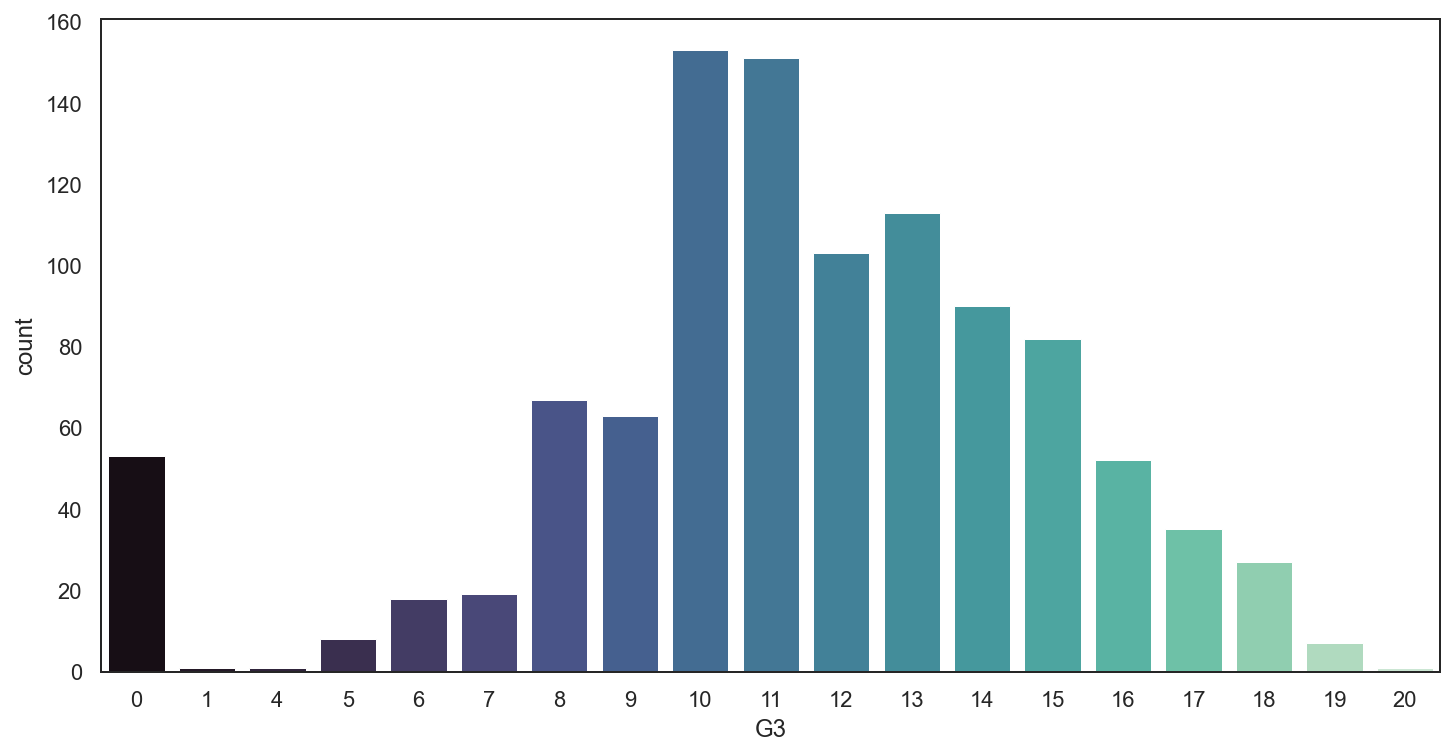

In [84]:
plt.figure(figsize=(12, 6))
sns.countplot(x="G3",data=df_student, palette = 'mako')
#sns.set_style("white")

#### The plot shows the range of G3 scores for the students. From this, we can see that most students scores were between 10 and 11. A little over 50 students scored 0 and a very few scored the full marks. About 7 students were cose to getting the full marks

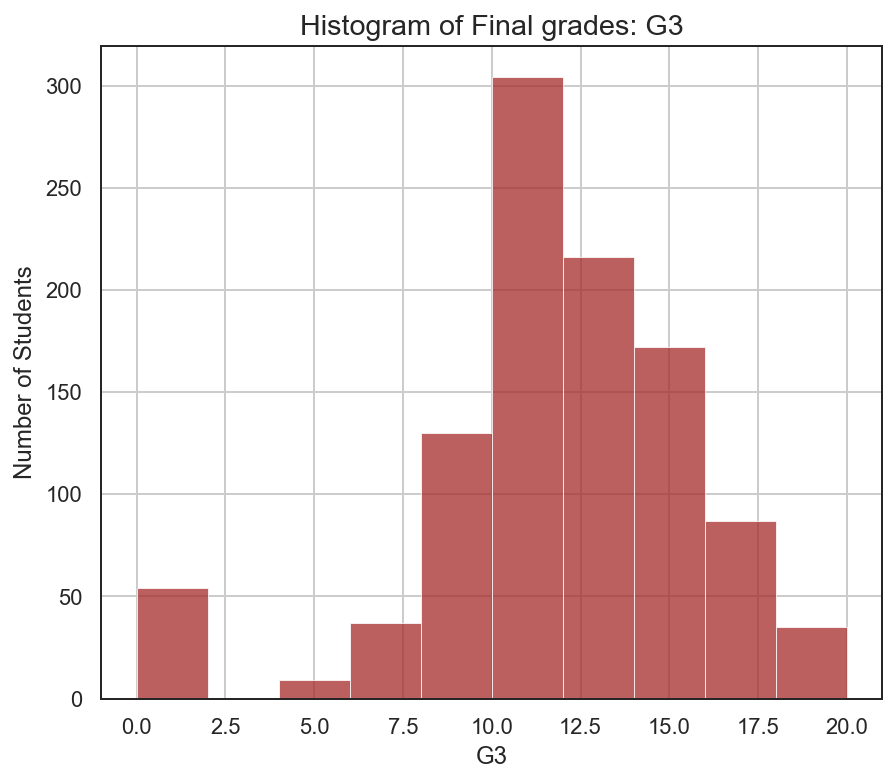

In [85]:
x = df_student["G3"]
sns.set_style("white")
plt.hist(x, 10, color= "brown", alpha=0.75)
plt.ylabel('Number of Students')
plt.xlabel('G3')
plt.title('Histogram of Final grades: G3')
plt.rcParams["figure.figsize"] = (10,10)
plt.grid(True)
plt.show()

#### This histogram shows that our data is left (negatively skewed). This shows that a greater number of students passed their examinations

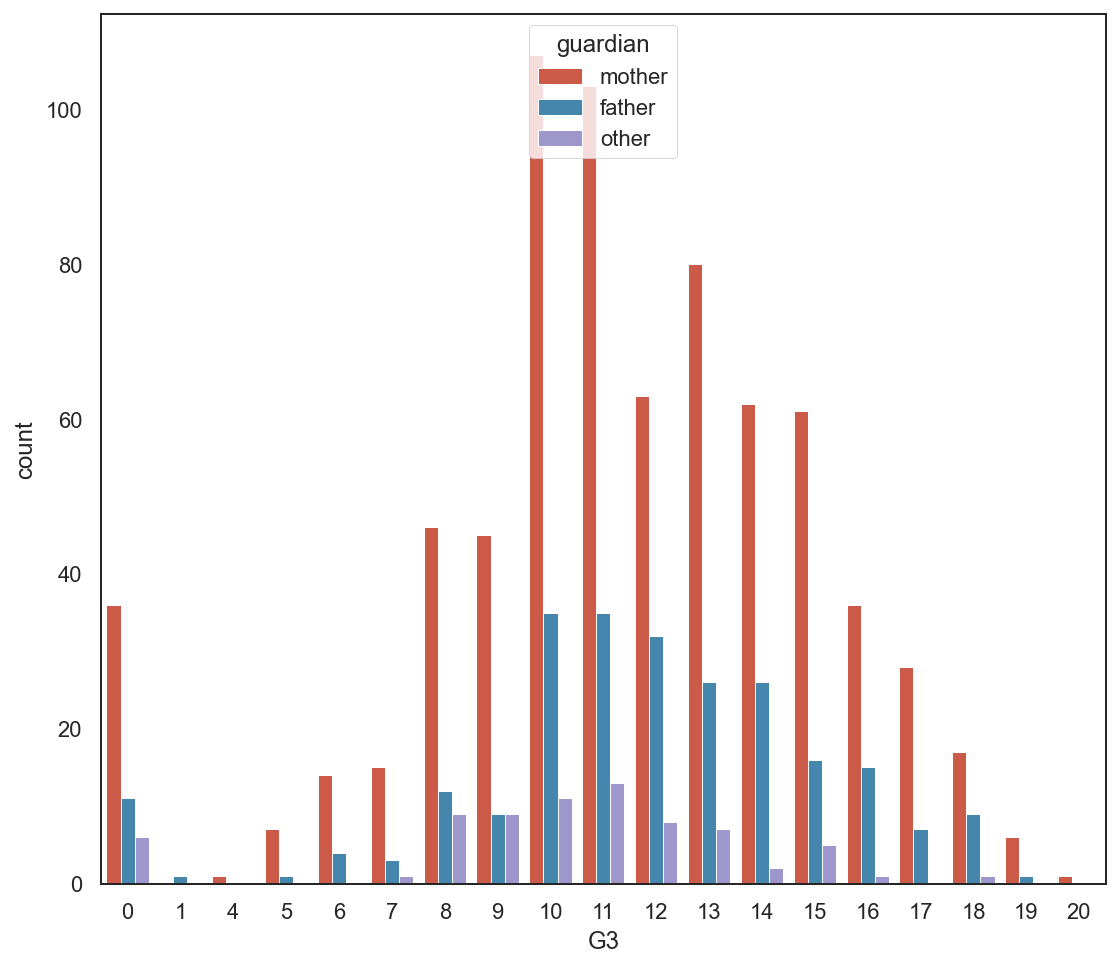

In [95]:
sns.countplot(x="G3", hue=df_student['guardian'], data=df_student)
plt.rcParams["figure.figsize"] = (9,10)

#### This is a count plot showing which type of guardian influence a student's score. From the plot, it cxan be seen that having a mother helps students perform better

### Feature Engineering and Selection

In [96]:
df_student

,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,F,18,Urban,GT3,A,4,4,at_home,teacher,course,...,4,3,4,1,1,3,6,5,6,6
1,F,17,Urban,GT3,T,1,1,at_home,other,course,...,5,3,3,1,1,3,4,5,5,6
2,F,15,Urban,LE3,T,1,1,at_home,other,other,...,4,3,2,2,3,3,10,7,8,10
3,F,15,Urban,GT3,T,4,2,health,services,home,...,3,2,2,1,1,5,2,15,14,15
4,F,16,Urban,GT3,T,3,3,other,other,home,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1039,F,19,Rural,GT3,T,2,3,services,other,course,...,5,4,2,1,2,5,4,10,11,10
1040,F,18,Urban,LE3,T,3,1,teacher,services,course,...,4,3,4,1,1,1,4,15,15,16
1041,F,18,Urban,GT3,T,1,1,other,other,course,...,1,1,1,1,1,5,6,11,12,9
1042,M,17,Urban,LE3,T,3,1,services,services,course,...,2,4,5,3,4,2,6,10,10,10


In [97]:
catVariables = ['sex','address','famsize','Pstatus','Mjob','Fjob','reason','guardian','schoolsup','famsup','paid','activities','nursery','higher','internet','romantic']

In [5]:
new_df_student = df_student

In [6]:
new_df_student

,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,F,18,U,GT3,A,4,4,at_home,teacher,course,...,4,3,4,1,1,3,6,5,6,6
1,F,17,U,GT3,T,1,1,at_home,other,course,...,5,3,3,1,1,3,4,5,5,6
2,F,15,U,LE3,T,1,1,at_home,other,other,...,4,3,2,2,3,3,10,7,8,10
3,F,15,U,GT3,T,4,2,health,services,home,...,3,2,2,1,1,5,2,15,14,15
4,F,16,U,GT3,T,3,3,other,other,home,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1039,F,19,R,GT3,T,2,3,services,other,course,...,5,4,2,1,2,5,4,10,11,10
1040,F,18,U,LE3,T,3,1,teacher,services,course,...,4,3,4,1,1,1,4,15,15,16
1041,F,18,U,GT3,T,1,1,other,other,course,...,1,1,1,1,1,5,6,11,12,9
1042,M,17,U,LE3,T,3,1,services,services,course,...,2,4,5,3,4,2,6,10,10,10


In [102]:
le = LabelEncoder()
new_df_student[catVariables] = new_df_student[catVariables].apply(lambda col: le.fit_transform(col))
new_df_student[catVariables].head()

,sex,address,famsize,Pstatus,Mjob,Fjob,reason,guardian,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic
0,0,1,0,0,0,4,0,1,1,0,0,0,1,1,0,0
1,0,1,0,1,0,2,0,0,0,1,0,0,0,1,1,0
2,0,1,1,1,0,2,2,1,1,0,1,0,1,1,1,0
3,0,1,0,1,1,3,1,1,0,1,1,1,1,1,1,1
4,0,1,0,1,2,2,1,0,0,1,1,0,1,1,0,0


In [103]:
most_correlated = new_df_student.corr().abs()['G3'].sort_values(ascending=False)
most_correlated

G3            1.000000
G2            0.910743
G1            0.809142
failures      0.383145
higher        0.236578
Medu          0.201472
studytime     0.161629
Fedu          0.159796
Dalc          0.129642
age           0.125282
address       0.117696
Walc          0.115740
reason        0.108671
internet      0.107064
Mjob          0.105640
traveltime    0.102627
romantic      0.098363
goout         0.097877
health        0.080079
schoolsup     0.079346
guardian      0.077320
freetime      0.064890
famsize       0.061209
famrel        0.054461
paid          0.049388
absences      0.045671
Fjob          0.040541
nursery       0.039950
activities    0.033998
sex           0.031472
Pstatus       0.030693
famsup        0.013313
Name: G3, dtype: float64

In [7]:
plt.figure(figsize = (7,6))
corr = new_df_student.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
age,1.00,-0.13,-0.14,0.05,-0.01,0.28,0.01,0.00,0.12,0.13,0.10,-0.03,0.15,-0.12,-0.12,-0.13
Medu,-0.13,1.00,0.64,-0.24,0.09,-0.19,0.02,0.00,0.03,0.00,-0.03,-0.01,0.06,0.23,0.22,0.20
Fedu,-0.14,0.64,1.00,-0.20,0.03,-0.19,0.01,0.00,0.03,-0.00,0.02,0.03,0.04,0.20,0.18,0.16
traveltime,0.05,-0.24,-0.20,1.00,-0.08,0.09,-0.01,-0.01,0.05,0.11,0.08,-0.03,-0.02,-0.12,-0.14,-0.10
studytime,-0.01,0.09,0.03,-0.08,1.00,-0.15,0.01,-0.09,-0.07,-0.16,-0.23,-0.06,-0.08,0.21,0.18,0.16
failures,0.28,-0.19,-0.19,0.09,-0.15,1.00,-0.05,0.10,0.07,0.12,0.11,0.05,0.10,-0.37,-0.38,-0.38
famrel,0.01,0.02,0.01,-0.01,0.01,-0.05,1.00,0.14,0.08,-0.08,-0.10,0.10,-0.06,0.04,0.04,0.05
freetime,0.00,0.00,0.00,-0.01,-0.09,0.10,0.14,1.00,0.32,0.14,0.13,0.08,-0.03,-0.05,-0.07,-0.06
goout,0.12,0.03,0.03,0.05,-0.07,0.07,0.08,0.32,1.00,0.25,0.40,-0.01,0.06,-0.10,-0.11,-0.10
Dalc,0.13,0.00,-0.00,0.11,-0.16,0.12,-0.08,0.14,0.25,1.00,0.63,0.07,0.13,-0.15,-0.13,-0.13


<Figure size 504x432 with 0 Axes>

In [106]:
#drop least correlated columns
df_features = new_df_student.drop(['sex','famsize','Pstatus','Fjob', 'guardian','activities','schoolsup','famsup', 'paid','nursery','romantic', 'goout', 'health', 'freetime', 'absences', 'famsize'], axis=1)
df_features

,age,address,Medu,Fedu,Mjob,reason,traveltime,studytime,failures,higher,internet,famrel,Dalc,Walc,G1,G2,G3
0,18,1,4,4,0,0,2,2,0,1,0,4,1,1,5,6,6
1,17,1,1,1,0,0,1,2,0,1,1,5,1,1,5,5,6
2,15,1,1,1,0,2,1,2,3,1,1,4,2,3,7,8,10
3,15,1,4,2,1,1,1,3,0,1,1,3,1,1,15,14,15
4,16,1,3,3,2,1,1,2,0,1,0,4,1,2,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1039,19,0,2,3,3,0,1,3,1,1,1,5,1,2,10,11,10
1040,18,1,3,1,4,0,1,2,0,1,1,4,1,1,15,15,16
1041,18,1,1,1,2,0,2,2,0,1,0,1,1,1,11,12,9
1042,17,1,3,1,3,0,2,1,0,1,1,2,3,4,10,10,10


In [108]:
# Extracting the dependent variables as features 
features = df_features.drop(['G3'], axis = 1)

In [109]:
# Extracting the independent variable as the target 
target = df_features['G3']

# Regression

### Random Forest Regression Model

In [311]:
# Splitting the dataset into training and test sets
x_train, x_test, y_train, y_test = train_test_split(features,target, test_size=0.2, random_state=0)

In [312]:
# Define Random Forest regressor
start_time = time.time()
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)

In [313]:
# fitting the model
regressor.fit(x_train, y_train)

RandomForestRegressor(random_state=0)

In [314]:
#using the model to predict 
y_pred = regressor.predict(x_test)
run_time = format(round((time.time() - start_time)/60,2))
print('Prediction:', y_pred[:10])
print (run_time)

Prediction: [ 5.   12.2  10.28 11.27  9.33 12.7  14.95 13.16  8.36  0.15]
0.01


### Feature Importance Plot

In [315]:
importances = regressor.feature_importances_

importances

array([0.01563611, 0.00287133, 0.00986126, 0.01091676, 0.01129887,
       0.01365118, 0.00823357, 0.01244055, 0.00919531, 0.00341318,
       0.00238631, 0.01777436, 0.00844925, 0.01047695, 0.02041194,
       0.84298308])

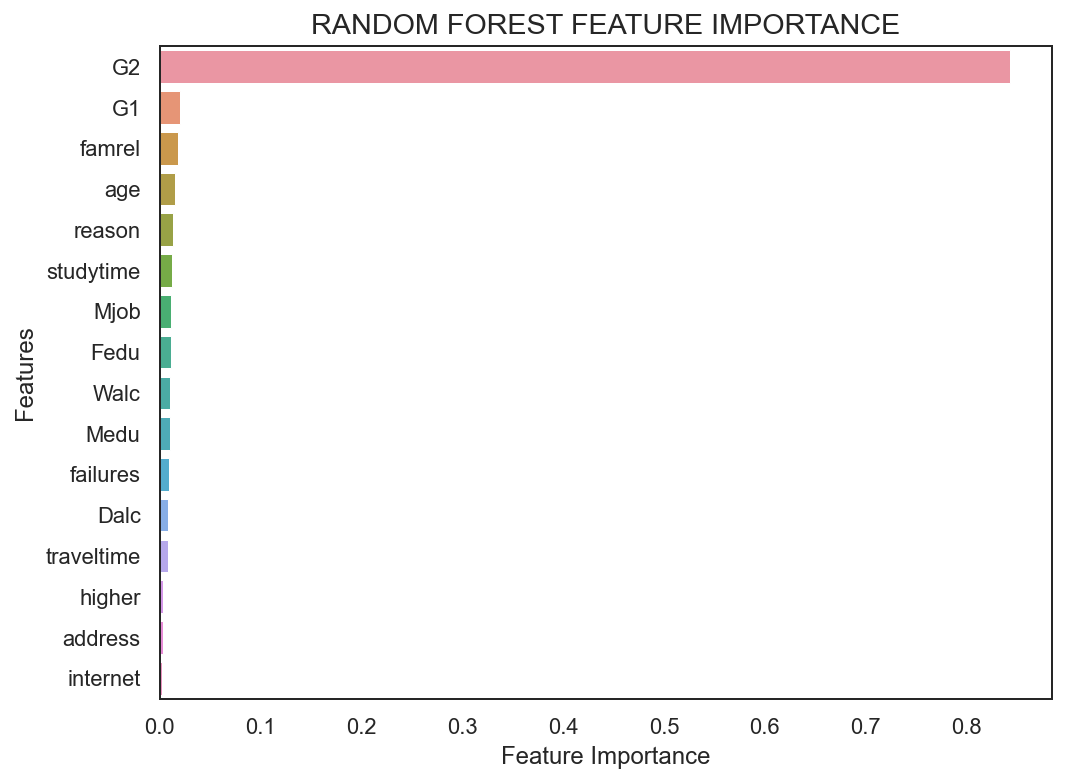

In [316]:
stat.featureImportancePlot(importances, features.columns,'RANDOM FOREST')

#### From the feature importance plot, it can be seen that G2 is the most important feature and best indicator that determines what the final grade G3 will be

### Estimating the Mean Square Error and accuracy of the model

In [317]:
#Evaluating the mean square error and accuracy of the model
meanSquareError = metrics.mean_squared_error(y_test, y_pred)

print('The Mean Squared Error for the model is:', meanSquareError)

The Mean Squared Error for the model is: 2.3463110984848488


In [318]:
meanAbsErr = metrics.mean_absolute_error(y_test, y_pred)
print('Mean Absolute Error:', meanAbsErr )

rtMeanSqErr = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', rtMeanSqErr)

Mean Absolute Error: 0.9734904306220097
Root Mean Squared Error: 1.5317673121218016


In [319]:
accuracy = round(regressor.score(x_test,y_test) * 100, 2)
print('Random Forest Regression Accuracy: ', accuracy,'%')

Random Forest Regression Accuracy:  75.01 %


In [320]:
print("Random Forest Regression Metrics")

Rf_model_accuracy = pd.DataFrame({
    'Metric': ['Mean Square Error','Mean Absolute Error', 'Root Mean Square Error', 'Accuracy'],
    'Score': [meanSquareError, meanAbsErr, rtMeanSqErr, accuracy]})

Rf_model_accuracy = Rf_model_accuracy.round(2)
Rf_model_accuracy

Random Forest Regression Metrics


,Metric,Score
0,Mean Square Error,2.35
1,Mean Absolute Error,0.97
2,Root Mean Square Error,1.53
3,Accuracy,75.01


# Classification

### Categorizing G3 into low, medium and High

In [321]:
#Categorising G3 into low, medium and high 
category = (-1, 9, 14, 20)
categoryName = ['poor','average','excellent']

In [322]:
df_features['G3']= pd.cut(df_features['G3'], bins= category, labels= categoryName)

In [323]:
df_features['G3'][:15]

0          poor
1          poor
2       average
3     excellent
4       average
5     excellent
6       average
7          poor
8     excellent
9     excellent
10         poor
11      average
12      average
13      average
14    excellent
Name: G3, dtype: category
Categories (3, object): ['poor' < 'average' < 'excellent']

In [324]:
df_features['G3'].unique()

['poor', 'average', 'excellent']
Categories (3, object): ['poor' < 'average' < 'excellent']

# Investigating and Solving Class Imbalance

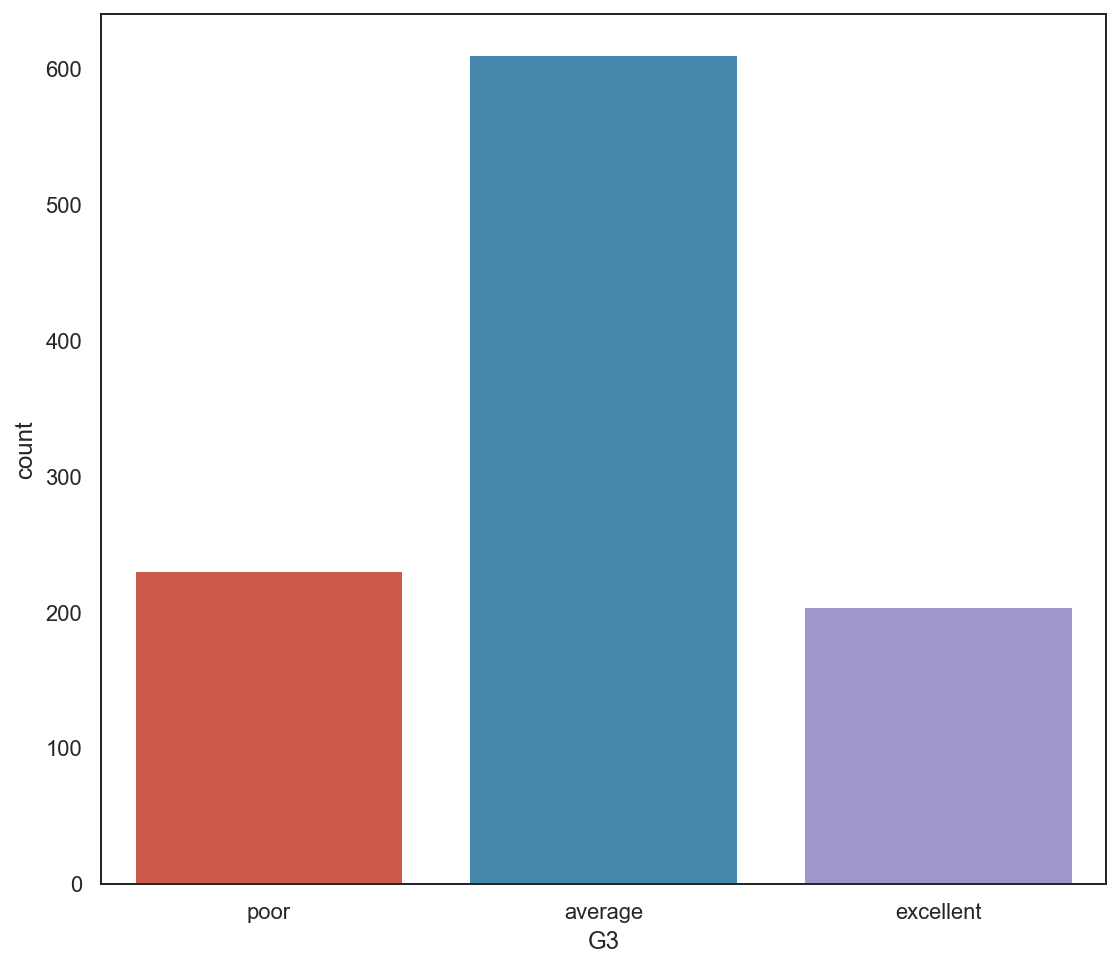

In [325]:
#Class distribution plot
sns.countplot(df_features['G3'])
#plt.figure(figsize=(10, 6))
plt.rcParams["figure.figsize"] = (10,6)

In [326]:
df_features['G3'].value_counts()

average      610
poor         230
excellent    204
Name: G3, dtype: int64

In [327]:
G3_class = LabelEncoder()

df_features['G3']= G3_class.fit_transform(df_features['G3'])

In [328]:
df_features.head()

,age,address,Medu,Fedu,Mjob,reason,traveltime,studytime,failures,higher,internet,famrel,Dalc,Walc,G1,G2,G3
0,18,1,4,4,0,0,2,2,0,1,0,4,1,1,5,6,2
1,17,1,1,1,0,0,1,2,0,1,1,5,1,1,5,5,2
2,15,1,1,1,0,2,1,2,3,1,1,4,2,3,7,8,0
3,15,1,4,2,1,1,1,3,0,1,1,3,1,1,15,14,1
4,16,1,3,3,2,1,1,2,0,1,0,4,1,2,6,10,0


In [329]:
df_features['G3'].value_counts()

0    610
2    230
1    204
Name: G3, dtype: int64

In [330]:
# Extracting the dependent and independent variables as features and target
class_features = df_features.drop(['G3'], axis =1)
class_target = df_features['G3']

In [331]:
# Class distribution summary
counter = Counter(class_target)
print('Before Sampling: ', counter)

Before Sampling:  Counter({0: 610, 2: 230, 1: 204})


### Using SMOTE For Resampling

In [332]:
#define sampling technique
sm = SMOTE()

# fit predictor and target variable
x_smote, y_smote = sm.fit_resample(class_features, class_target)

In [333]:
counter = Counter(y_smote)
print('After Sampling: ', counter)

After Sampling:  Counter({2: 610, 0: 610, 1: 610})


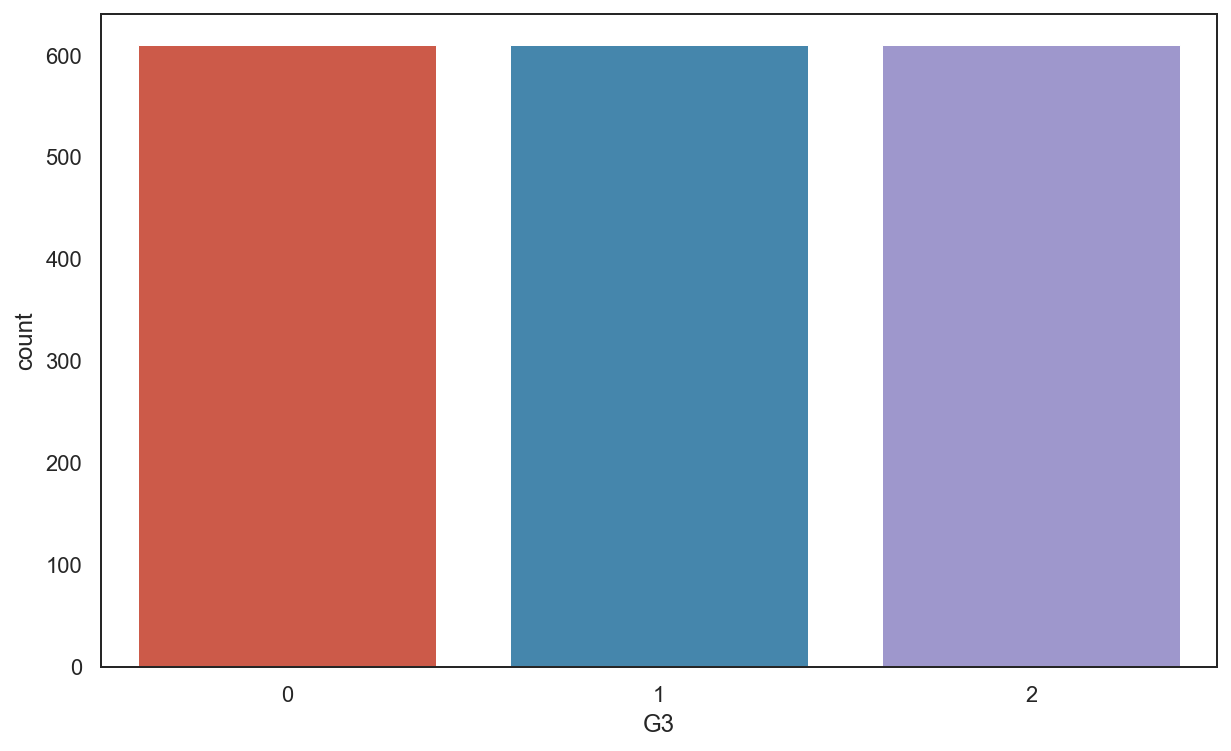

In [334]:
#Class distribution plot after sampling
sns.countplot(y_smote)
#plt.figure(figsize=(10, 6))
plt.rcParams["figure.figsize"] = (10,6)

In [335]:
#split our data for training
x_sm_train, x_sm_test, y_sm_train, y_sm_test = train_test_split(x_smote,y_smote, test_size=0.20, random_state=0)

In [336]:
#Standardizing the data
scaler = StandardScaler()
x_sm_train = scaler.fit_transform(x_sm_train)
x_sm_test = scaler.fit_transform(x_sm_test)

In [337]:
x_sm_test[:5]

array([[-0.4975571 ,  0.66403681,  1.33947326,  1.75228158,  0.91849889,
        -0.89997352, -0.60013619, -1.10611373, -0.40885145,  0.33535355,
         0.61735895,  1.33787143, -0.49622302, -0.08685796,  0.8587074 ,
         0.97301464],
       [-0.4975571 , -1.50594062, -1.48344735, -1.16730139, -1.81459537,
        -0.89997352,  4.00790253,  0.08458517, -0.40885145,  0.33535355,
        -1.61980319,  1.33787143, -0.49622302, -0.90198656,  0.8587074 ,
         0.47667547],
       [-1.36061824,  0.66403681,  1.33947326,  1.75228158,  0.91849889,
        -0.89997352, -0.60013619, -1.10611373, -0.40885145,  0.33535355,
         0.61735895, -0.87778894,  0.72268722,  0.72827063, -0.92363801,
        -0.2678333 ],
       [ 0.36550403,  0.66403681,  0.39849972, -0.19410706,  0.00746747,
         1.61445631,  0.93587672,  0.08458517, -0.40885145,  0.33535355,
         0.61735895,  0.23004124, -0.49622302,  0.72827063,  0.8587074 ,
         0.97301464],
       [ 1.22856517, -1.50594062, -1

### Building The Predictive Models for the Smote Oversampling

#### Random Forest Classification

In [338]:
start_time = time.time()
# Create Random Forest Classifier
rf_clf = RandomForestClassifier(n_estimators=100)

#Train the model using the training sets 
rf_model = rf_clf.fit(x_sm_train, y_sm_train)

#Prediction on test set 
pred_rf = rf_model.predict(x_sm_test)
rf_runtime = format(round((time.time() - start_time)/60,2))

In [339]:
pred_rf[:10]

array([1, 0, 0, 1, 2, 1, 2, 0, 1, 0])

In [340]:
accuracy_score_rf = round(rf_clf.score(x_sm_test, y_sm_test) * 100, 2)
print(classification_report(y_sm_test,pred_rf))
print(rf_runtime)
print(confusion_matrix(y_sm_test,pred_rf))
pd.crosstab(y_sm_test, pred_rf, rownames=['Actual'], colnames=['Predicted'], margins=True)

              precision    recall  f1-score   support

           0       0.91      0.92      0.92       129
           1       0.98      0.95      0.97       117
           2       0.93      0.95      0.94       120

    accuracy                           0.94       366
   macro avg       0.94      0.94      0.94       366
weighted avg       0.94      0.94      0.94       366

0.0
[[119   2   8]
 [  6 111   0]
 [  6   0 114]]


Predicted,0,1,2,All
Actual,,,,
0,119,2,8,129
1,6,111,0,117
2,6,0,114,120
All,131,113,122,366


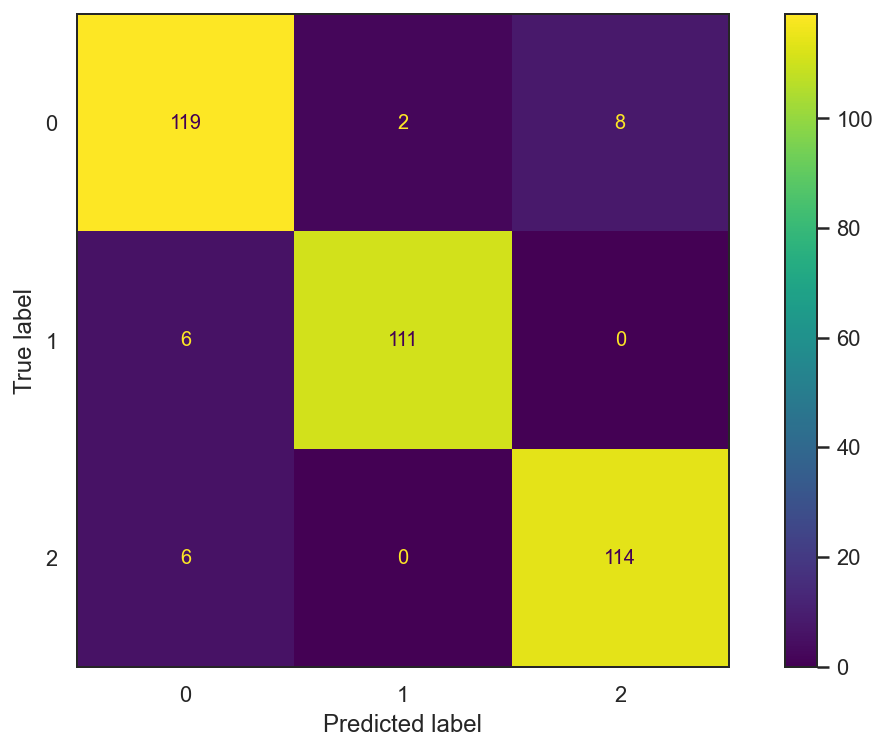

In [341]:
plot_confusion_matrix(rf_clf, x_sm_test, y_sm_test)  
plt.show()

### Random Forest with hyperparameter tuning using RandomSearchCV

In [342]:
rf_clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [343]:
start_time = time.time()
parameters = {"max_depth": [3, None],
              "max_features": sp_randint(1, 11),
              "min_samples_split": sp_randint(2, 11),
              "min_samples_leaf": sp_randint(1, 11),
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"]}

In [344]:
samples = 10  # number of random samples 
random_SearchCV = RandomizedSearchCV(rf_clf, param_distributions=parameters, n_iter=samples,cv=5)

In [345]:
random_SearchCV.fit(x_smote, y_smote)
rf_runtime_hp = format(round((time.time() - start_time)/60,2))
print(random_SearchCV.best_params_)

{'bootstrap': False, 'criterion': 'entropy', 'max_depth': None, 'max_features': 9, 'min_samples_leaf': 4, 'min_samples_split': 9}


In [346]:
random_SearchCV.cv_results_['mean_test_score']

array([0.90655738, 0.90601093, 0.90491803, 0.87923497, 0.90765027,
       0.88251366, 0.86174863, 0.88251366, 0.80765027, 0.90382514])

In [347]:
print(random_SearchCV.score(x_smote,y_smote))
print(rf_runtime_hp)

0.9814207650273225
0.23


#### 2. Support Vector Machine

In [348]:
start_time = time.time()
svc = SVC(kernel='rbf', C=1, gamma='auto')
svc_model = svc.fit(x_sm_train, y_sm_train)
predict_svc = svc_model.predict(x_sm_test)
svm_runtime = format(round((time.time() - start_time)/60,2))

In [349]:
predict_svc[:10]

array([1, 0, 2, 1, 2, 1, 2, 0, 1, 0])

In [350]:
print(classification_report(y_sm_test,predict_svc))
pd.crosstab(y_sm_test, predict_svc, rownames=['Actual'], colnames=['Predicted'], margins=True)
accuracy_score_svm = round(svc.score(x_sm_test, y_sm_test) * 100, 2)
print(svm_runtime)
#The confusion Matrix
print(confusion_matrix(y_sm_test,predict_svc))

              precision    recall  f1-score   support

           0       0.86      0.88      0.87       129
           1       0.96      0.94      0.95       117
           2       0.91      0.91      0.91       120

    accuracy                           0.91       366
   macro avg       0.91      0.91      0.91       366
weighted avg       0.91      0.91      0.91       366

0.0
[[113   5  11]
 [  7 110   0]
 [ 11   0 109]]


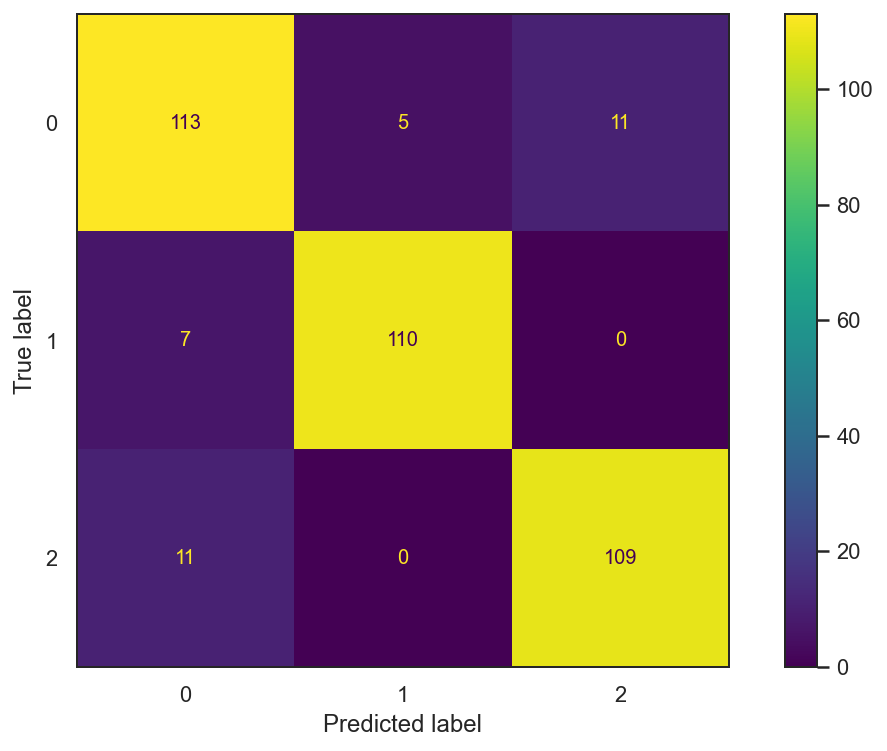

In [351]:
plot_confusion_matrix(svc, x_sm_test, y_sm_test)  
plt.show()

In [352]:
svc.get_params()

{'C': 1,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'auto',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [355]:
start_time = time.time()
parameter_grid = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001],'kernel': ['rbf', 'poly', 'sigmoid']}

grid = GridSearchCV(SVC(), parameter_grid, refit = True, verbose = 3)
 
# fitting the model for grid search
grid.fit(x_smote, y_smote)

# print best parameter after tuning
print(grid.best_params_)
 
# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

grid_predictions = grid.predict(x_sm_test)
 
# print classification report
print(classification_report(y_test, grid_predictions))

print(grid.score(x_smote,y_smote))
svm_runtime_hp = format(round((time.time() - start_time)/60,2))

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.391 total time=   0.2s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.385 total time=   0.2s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.522 total time=   0.2s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.511 total time=   0.2s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.478 total time=   0.2s
[CV 1/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.836 total time=   2.3s
[CV 2/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.850 total time=   4.9s
[CV 3/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.923 total time=   7.1s
[CV 4/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.910 total time=   7.0s
[CV 5/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.872 total time=   4.3s
[CV 1/5] END ....C=0.1, gamma=1, kernel=sigmoid;, score=0.333 total time=   0.1s
[CV 2/5] END ....C=0.1, gamma=1, kernel=sigmoid

[CV 2/5] END ...C=1, gamma=0.01, kernel=sigmoid;, score=0.068 total time=   0.3s
[CV 3/5] END ...C=1, gamma=0.01, kernel=sigmoid;, score=0.063 total time=   0.4s
[CV 4/5] END ...C=1, gamma=0.01, kernel=sigmoid;, score=0.014 total time=   0.5s
[CV 5/5] END ...C=1, gamma=0.01, kernel=sigmoid;, score=0.036 total time=   0.5s
[CV 1/5] END ......C=1, gamma=0.001, kernel=rbf;, score=0.836 total time=   0.1s
[CV 2/5] END ......C=1, gamma=0.001, kernel=rbf;, score=0.877 total time=   0.1s
[CV 3/5] END ......C=1, gamma=0.001, kernel=rbf;, score=0.913 total time=   0.1s
[CV 4/5] END ......C=1, gamma=0.001, kernel=rbf;, score=0.926 total time=   0.1s
[CV 5/5] END ......C=1, gamma=0.001, kernel=rbf;, score=0.891 total time=   0.1s
[CV 1/5] END .....C=1, gamma=0.001, kernel=poly;, score=0.814 total time=   0.0s
[CV 2/5] END .....C=1, gamma=0.001, kernel=poly;, score=0.891 total time=   0.0s
[CV 3/5] END .....C=1, gamma=0.001, kernel=poly;, score=0.910 total time=   0.0s
[CV 4/5] END .....C=1, gamma

[CV 4/5] END .....C=100, gamma=0.1, kernel=poly;, score=0.913 total time=   7.5s
[CV 5/5] END .....C=100, gamma=0.1, kernel=poly;, score=0.872 total time=   4.1s
[CV 1/5] END ..C=100, gamma=0.1, kernel=sigmoid;, score=0.333 total time=   0.1s
[CV 2/5] END ..C=100, gamma=0.1, kernel=sigmoid;, score=0.333 total time=   0.1s
[CV 3/5] END ..C=100, gamma=0.1, kernel=sigmoid;, score=0.333 total time=   0.1s
[CV 4/5] END ..C=100, gamma=0.1, kernel=sigmoid;, score=0.333 total time=   0.1s
[CV 5/5] END ..C=100, gamma=0.1, kernel=sigmoid;, score=0.333 total time=   0.1s
[CV 1/5] END .....C=100, gamma=0.01, kernel=rbf;, score=0.874 total time=   0.0s
[CV 2/5] END .....C=100, gamma=0.01, kernel=rbf;, score=0.891 total time=   0.0s
[CV 3/5] END .....C=100, gamma=0.01, kernel=rbf;, score=0.915 total time=   0.0s
[CV 4/5] END .....C=100, gamma=0.01, kernel=rbf;, score=0.934 total time=   0.0s
[CV 5/5] END .....C=100, gamma=0.01, kernel=rbf;, score=0.915 total time=   0.0s
[CV 1/5] END ....C=100, gamm

ValueError: Found input variables with inconsistent numbers of samples: [209, 366]

#### 3. Multi-Layer Perceptron Neural Networks

In [356]:
start_time = time.time()
# Create Random Forest Classifier
mlpn_clf = Perceptron(random_state =100)

#Train the model using the training sets 
mlpn_model = mlpn_clf.fit(x_sm_train, y_sm_train)

#Prediction on test set 
pred_mlpn = mlpn_model.predict(x_sm_test)
mlp_runtime = format(round((time.time() - start_time)/60,2))

In [357]:
pred_mlpn[:10]

array([1, 0, 2, 1, 2, 1, 2, 0, 1, 0])

In [358]:
print(classification_report(y_sm_test,pred_mlpn))
pd.crosstab(y_sm_test, pred_mlpn, rownames=['Actual'], colnames=['Predicted'], margins=True)
accuracy_score_mlp = round(mlpn_clf.score(x_sm_test, y_sm_test) * 100, 2)
print(mlp_runtime)
print ('MLP accuracy score:', accuracy_score_mlp,'%')


              precision    recall  f1-score   support

           0       0.83      0.74      0.78       129
           1       0.87      0.97      0.92       117
           2       0.86      0.86      0.86       120

    accuracy                           0.85       366
   macro avg       0.85      0.86      0.85       366
weighted avg       0.85      0.85      0.85       366

0.0
MLP accuracy score: 85.25 %


In [359]:
#The confusion Matrix
print(confusion_matrix(y_sm_test,pred_mlpn))

[[ 95  17  17]
 [  3 114   0]
 [ 17   0 103]]


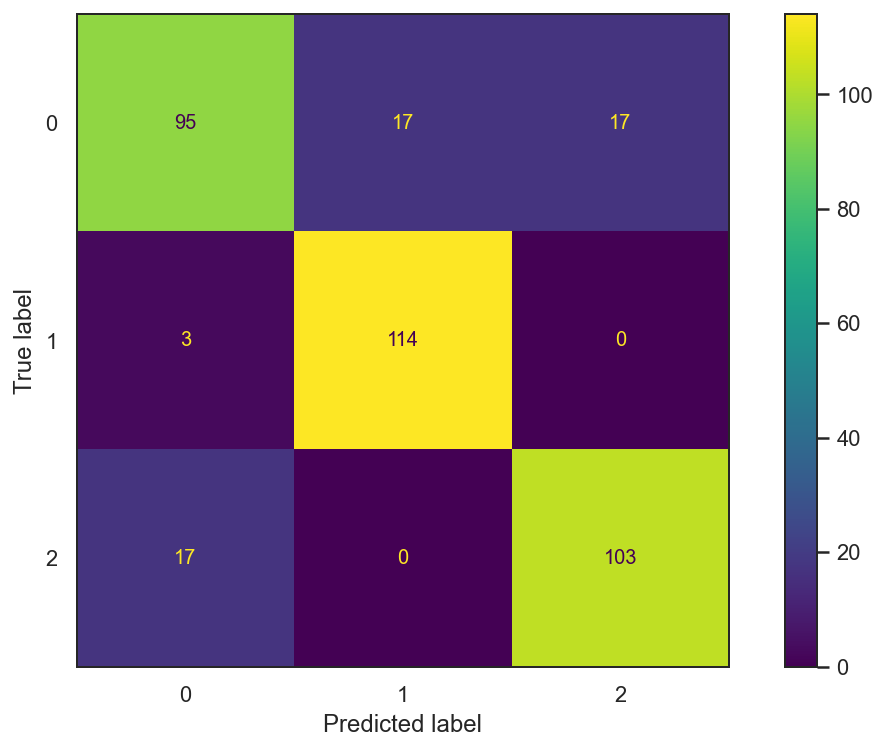

In [360]:
plot_confusion_matrix(mlpn_clf, x_sm_test, y_sm_test)  
plt.show()

In [389]:
print("Machine Learning algorithm scores with Oversampling")

df_models_accuracy = pd.DataFrame({
    'Model': ['Random Forest','SVM', 'MLP'],
    'Score': [accuracy_score_rf, accuracy_score_svm, accuracy_score_mlp]})
df_models_accuracy

Machine Learning algorithm scores with Oversampling


,Model,Score
0,Random Forest,93.99
1,SVM,90.71
2,MLP,85.25


In [362]:
mlpn_clf.get_params()

{'alpha': 0.0001,
 'class_weight': None,
 'early_stopping': False,
 'eta0': 1.0,
 'fit_intercept': True,
 'l1_ratio': 0.15,
 'max_iter': 1000,
 'n_iter_no_change': 5,
 'n_jobs': None,
 'penalty': None,
 'random_state': 100,
 'shuffle': True,
 'tol': 0.001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

### Using Imblearn Random Undersampling for Class Imbalance

In [363]:
counter = Counter(class_target)
print('Before Sampling: ', counter)

Before Sampling:  Counter({0: 610, 2: 230, 1: 204})


In [364]:
#split our data for training
x_train_rus, x_test_rus, y_train_rus, y_test_rus = train_test_split(class_features,class_target, test_size=0.20, random_state=0)

#x_sm_train, x_sm_test, y_sm_train, y_sm_test = train_test_split(x_smote,y_smote, test_size=0.20, random_state=0)

In [365]:
y_train_rus.value_counts() # lower value due to splitted dataset

0    479
2    187
1    169
Name: G3, dtype: int64

In [366]:
#define sampling technique
rus = RandomUnderSampler(random_state=42, replacement=True)

# fit predictor and target variable
x_rus, y_rus = rus.fit_resample(x_train_rus, y_train_rus)
# x_rus, y_rus = rus.fit_resample(class_features, class_target)
y_rus.value_counts()

0    169
1    169
2    169
Name: G3, dtype: int64

In [367]:
print('original dataset shape:', Counter(y_train_rus))
print('Resample dataset shape', Counter(y_rus))

original dataset shape: Counter({0: 479, 2: 187, 1: 169})
Resample dataset shape Counter({0: 169, 1: 169, 2: 169})


Text(0, 0.5, 'Frequency')

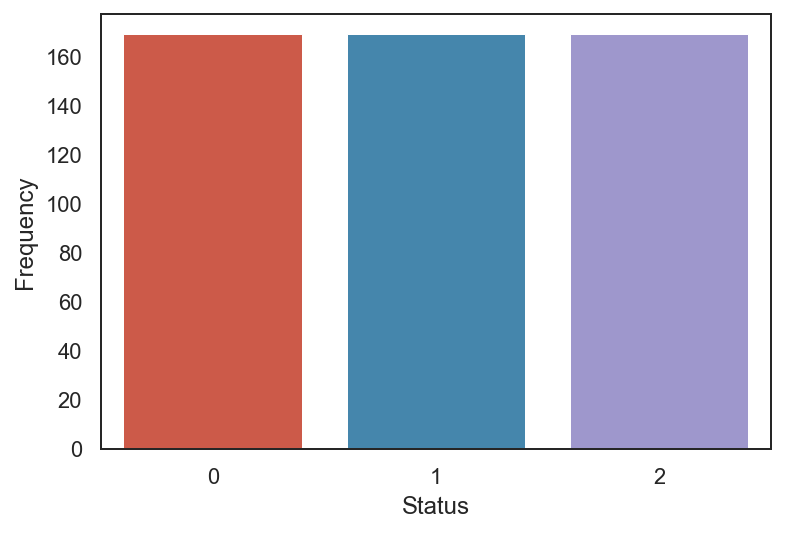

In [368]:
plt.figure(figsize=(6,4))

data = y_rus.value_counts()

ax = sns.barplot(x=data.index, y=data.values)
#ax.bar_label(ax.containers[0])

plt.xlabel('Status')
plt.ylabel('Frequency')


In [369]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train_rus)
x_test = scaler.fit_transform(x_test_rus)

In [370]:
x_test[:5]

array([[ 4.19393141,  0.59024325,  0.30600989, -1.31665212,  0.85099341,
         0.60272566, -0.76761944, -1.1057356 ,  3.89189617, -3.25747005,
         0.54601891,  1.10475837,  3.83753654,  2.06719687, -1.67237183,
        -1.14725497],
       [ 0.98613026,  0.59024325,  0.30600989,  0.53019548,  0.85099341,
         0.60272566,  0.67771806,  0.11057356, -0.41944464,  0.30698671,
         0.54601891, -0.01067399, -0.56930487,  0.52142175,  0.68701099,
         0.28211188],
       [ 0.98613026,  0.59024325, -0.55826129, -0.39322832,  0.06747965,
        -1.07686985, -0.76761944, -1.1057356 , -0.41944464,  0.30698671,
         0.54601891, -0.01067399,  0.53240548,  1.29430931, -0.32415307,
        -0.43257155],
       [ 0.18417997,  0.59024325,  0.30600989,  0.53019548,  0.85099341,
        -1.07686985,  0.67771806,  2.54319189,  1.01766896,  0.30698671,
        -1.83143841,  1.10475837,  1.63411583,  1.29430931, -0.32415307,
        -0.07522983],
       [-0.61777032,  0.59024325, -0

### Building The Predictive Models for Random Undersampling

#### 1. Random Forest Model

In [371]:
start_time = time.time()
# Create Random Forest Classifier
rf_clf_rus = RandomForestClassifier(n_estimators=100, )

#Train the model using the training sets 
rf_model_rus = rf_clf.fit(x_rus, y_rus)

#Prediction on test set 
pred_rf_rus = rf_model.predict(x_test_rus)
rf_clf_rus_runtime = format(round((time.time() - start_time)/60,2))

In [372]:
pred_rf_rus[:10]

array([2, 0, 0, 0, 2, 0, 1, 0, 2, 2])

In [373]:
print(rf_clf_rus_runtime)
print(classification_report(y_test_rus,pred_rf_rus))
accuracy_score_rfu = round(rf_model_rus.score(x_test_rus, y_test_rus) * 100, 2)
pd.crosstab(y_test_rus, pred_rf_rus, rownames=['Actual'], colnames=['Predicted'], margins=True)

0.0
              precision    recall  f1-score   support

           0       0.94      0.75      0.83       131
           1       0.77      0.94      0.85        35
           2       0.63      0.91      0.74        43

    accuracy                           0.81       209
   macro avg       0.78      0.87      0.81       209
weighted avg       0.85      0.81      0.82       209



Predicted,0,1,2,All
Actual,,,,
0,98,10,23,131
1,2,33,0,35
2,4,0,39,43
All,104,43,62,209


In [374]:
print(confusion_matrix(y_test_rus,pred_rf_rus))

[[98 10 23]
 [ 2 33  0]
 [ 4  0 39]]


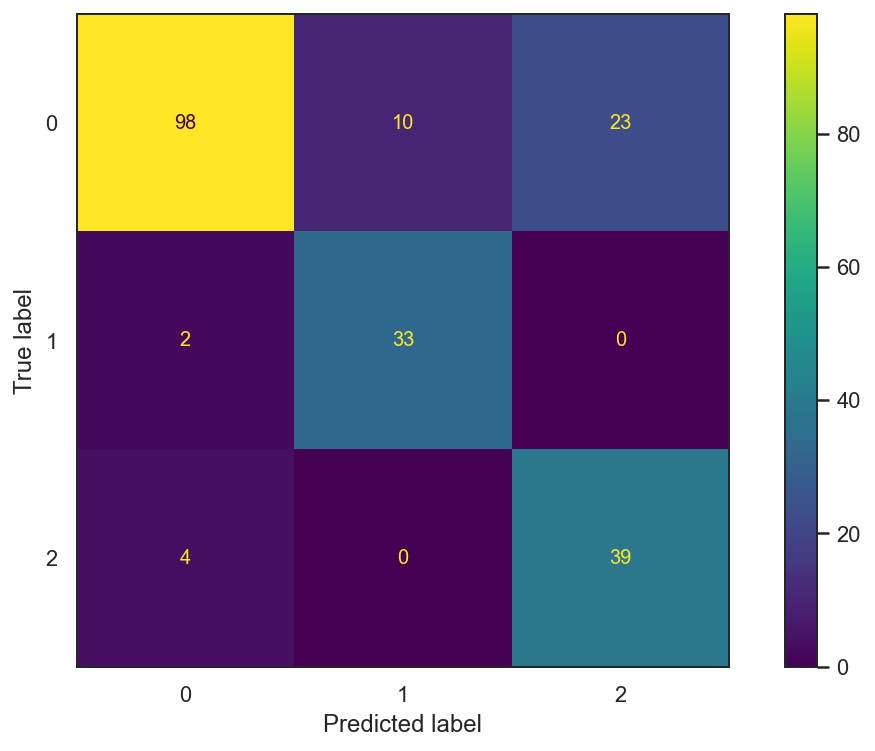

In [375]:
plot_confusion_matrix(rf_model_rus, x_test_rus, y_test_rus)  
plt.show()

#### 2. Support Vector Machine


In [376]:
start_time = time.time()
svc_rus = SVC(kernel='rbf', C=1, gamma='auto')

In [377]:
svc_model_rus = svc.fit(x_rus, y_rus)

In [378]:
predict_svc_rus = svc_model_rus.predict(x_test_rus)
svc_rus_runtime = format(round((time.time() - start_time)/60,2))

In [379]:
predict_svc_rus[:10]

array([2, 0, 0, 0, 2, 0, 1, 0, 2, 2])

In [380]:
accuracy_score_svc_rus = round(svc_model_rus.score(x_test_rus, y_test_rus) * 100, 2)
print(classification_report(y_test_rus,predict_svc_rus))
print(svc_rus_runtime)
pd.crosstab(y_test_rus, predict_svc_rus, rownames=['Actual'], colnames=['Predicted'], margins=True)

              precision    recall  f1-score   support

           0       0.94      0.77      0.85       131
           1       0.79      0.97      0.87        35
           2       0.64      0.88      0.75        43

    accuracy                           0.83       209
   macro avg       0.79      0.88      0.82       209
weighted avg       0.86      0.83      0.83       209

0.0


Predicted,0,1,2,All
Actual,,,,
0,101,9,21,131
1,1,34,0,35
2,5,0,38,43
All,107,43,59,209


In [381]:
print(confusion_matrix(y_test_rus,predict_svc_rus))

[[101   9  21]
 [  1  34   0]
 [  5   0  38]]


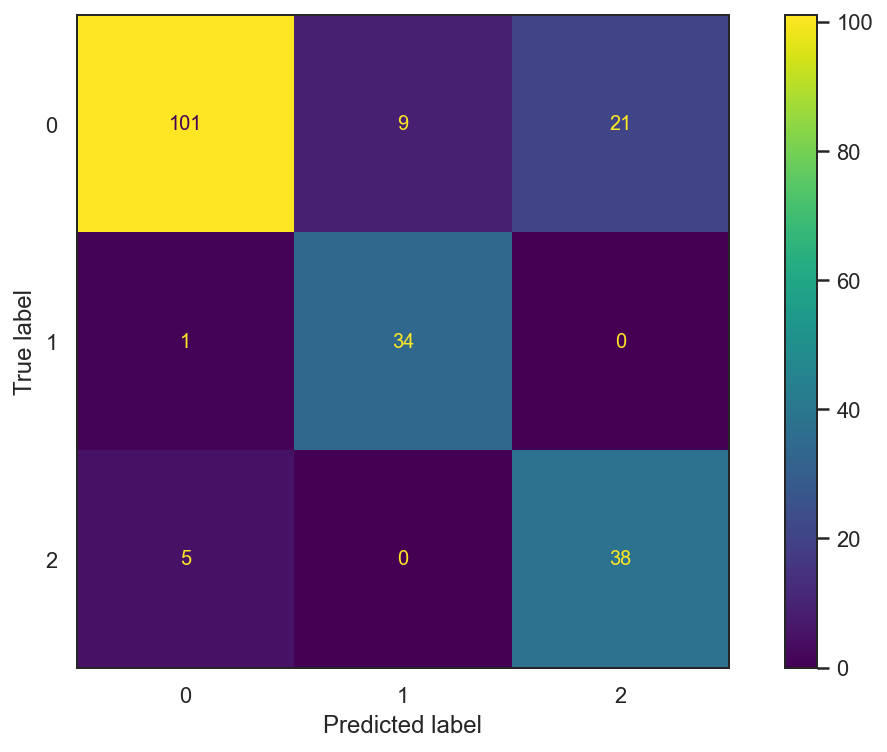

In [382]:
plot_confusion_matrix(svc_model_rus, x_test_rus, y_test_rus)  
plt.show()

#### 3. Multi-Layer Perceptron Neural Networks

In [383]:
start_time = time.time()
# Create Random Forest Classifier
mlpn_clf_rus = Perceptron(random_state =100)

#Train the model using the training sets 
mlpn_model_rus = mlpn_clf_rus.fit(x_rus, y_rus)

#Prediction on test set 
pred_mlpn_rus = mlpn_model_rus.predict(x_test_rus)
mlpn_clf_rus_runtime = format(round((time.time() - start_time)/60,2))

In [384]:
pred_mlpn_rus[:10]

array([2, 0, 0, 0, 2, 0, 1, 0, 2, 2])

In [385]:
accuracy_score_mlp_rus = round(mlpn_model_rus.score(x_test_rus, y_test_rus) * 100, 2)
print(classification_report(y_test_rus,pred_mlpn_rus))
print(mlpn_clf_rus_runtime)
pd.crosstab(y_test_rus, pred_mlpn_rus, rownames=['Actual'], colnames=['Predicted'], margins=True)

              precision    recall  f1-score   support

           0       0.86      0.77      0.81       131
           1       0.89      0.69      0.77        35
           2       0.58      0.86      0.69        43

    accuracy                           0.78       209
   macro avg       0.77      0.77      0.76       209
weighted avg       0.80      0.78      0.78       209

0.0


Predicted,0,1,2,All
Actual,,,,
0,101,3,27,131
1,11,24,0,35
2,6,0,37,43
All,118,27,64,209


In [386]:
#The confusion Matrix
print(confusion_matrix(y_test_rus,pred_mlpn_rus))

[[101   3  27]
 [ 11  24   0]
 [  6   0  37]]


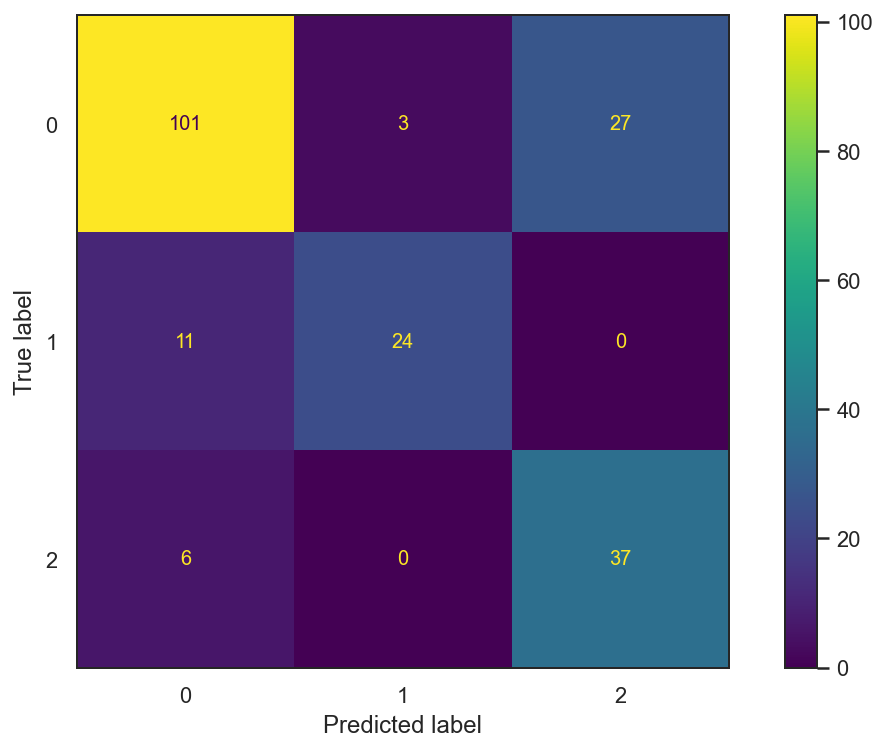

In [387]:
plot_confusion_matrix(mlpn_clf_rus, x_test_rus, y_test_rus)  
plt.show()

In [390]:
print("Machine Learning algorithm scores with Undersampling")

df_models_accuracy = pd.DataFrame({
    'Model': ['Random Forest','SVM', 'MLP'],
    'Score': [accuracy_score_rfu, accuracy_score_svc_rus, accuracy_score_mlp_rus]})
df_models_accuracy

Machine Learning algorithm scores with Undersampling


,Model,Score
0,Random Forest,81.34
1,SVM,82.78
2,MLP,77.51
